In [32]:
import pandas as pd

SHEET_ID = '1_35OvRNVHcvqgEJQq0coMX1KOUjcKED5pgQn1r50sx4'
SHEET_NAME = ""
url = f"https://docs.google.com/spreadsheets/d/{SHEET_ID}/gviz/tq?tqx=out:csv&sheet={SHEET_NAME}"
df_raw = pd.read_csv(url)

In [33]:
df_clean = df_raw.rename(columns={"Risultato": "Risultato_Bianco", "Unnamed: 7": "Risultato_Nero"})
df_clean = df_clean[df_clean.columns.drop(list(df_clean.filter(regex='Unnamed:')))]
df_clean.dropna(subset=['Bianco','Nero'], inplace = True)
df_clean['Turno'] = df_clean['Turno'].fillna(method='ffill')
df_clean["ECO_cluster"] = df_clean["ECO"].str[:1]
df_clean

,Turno,Data,Bianco,Nero,Risultato_Bianco,Risultato_Nero,Partita,Accuratezza Bianco,Accuretezza Nero,Blunder Bianco,Blunder Nero,ECO,Apertura,ECO_cluster
0,1.0,10/11/2022,Pierluigi Olivetti,Alessandro Piazza,1.0,0.0,https://lichess.org/study/XqUzpHu5/Opshh99a#0,80.0,66.0,1,2,B01,Scandinavian Defense (Center-Counter Defense),B
1,1.0,10/11/2022,Giampaolo Camera,Saverio Tammarazio,0.0,1.0,https://lichess.org/study/XqUzpHu5/BpgZYFKi#0,80.0,93.0,1,0,B10,"Caro-Kann Defense, Irregular Responses",B
2,1.0,10/11/2022,Franco Saiano,Matteo Alticozzi,1.0,0.0,https://lichess.org/study/XqUzpHu5/tGhJKlEQ#0,60.0,39.0,3,2,B12,Caro-Kann defense,B
3,1.0,10/11/2022,Pietro Andreetta,Ezio Del Nero,0.0,1.0,https://lichess.org/study/XqUzpHu5/4pGxp4me#0,71.0,79.0,3,2,B06,Robatsch (Modern) defense,B
4,1.0,10/11/2022,Lorenzo Satta,Sara Biagetti,1.0,0.0,https://lichess.org/study/XqUzpHu5/d6xeCIxk#0,99.0,80.0,0,1,C42,"Petrov's Defense, Classical Variation",C
5,1.0,10/11/2022,Daniele Calucci,Antonello Pumilia,1.0,0.0,https://lichess.org/study/XqUzpHu5/Hpp7L2PX#0,79.0,74.0,1,3,A34,"English Opening, Symmetrical",A
6,1.0,10/11/2022,Riccardo Dordoni,Lorenzo Divano,0.0,1.0,https://lichess.org/study/XqUzpHu5/eBJrgm3G#0,63.0,62.0,7,6,C02,"French, Advance Variation",C
7,1.0,10/11/2022,Lorenzo Sangiorgi,Luigi Chirico,0.5,0.5,https://lichess.org/study/XqUzpHu5/LsfoGa16#0,91.0,90.0,0,1,A40,"Queen's Pawn Game, Irregular Defences",A
8,1.0,10/11/2022,Enrico Moresco,Marco Stanizzi,0.0,1.0,https://lichess.org/study/XqUzpHu5/L3Jugv4A#0,70.0,82.0,4,4,C29,"Vienna Gambit, Kaufmann Variation",C
9,2.0,10/18/2022,Lorenzo Divano,Pierluigi Olivetti,0.5,0.5,https://lichess.org/study/XqUzpHu5/ofbvQJ6G#0,83.0,85.0,1,1,B00,"King's Pawn Opening, Irregular Defenses",B


In [34]:
df_opening = df_clean[['ECO','Apertura','ECO_cluster']]
df_opening = df_opening.value_counts(['ECO','Apertura','ECO_cluster']).reset_index(name='count')
df_opening["Apertura"] = df_opening["ECO"] + ' - ' + df_opening["Apertura"]
df_opening.drop(columns=['ECO'],inplace = True)
df_opening=df_opening.sort_values(by=['ECO_cluster'])
df_opening

,Apertura,ECO_cluster,count
29,"A34 - English Opening, Symmetrical",A,1
26,"A25 - English Opening, Sicilian Reversed",A,1
6,A01 - Larsen's Opening,A,2
8,A00 - Irregular Openings,A,2
9,A51 - Budapest Defense declined,A,1
10,"A40 - Queen's Pawn Game, Irregular Defences",A,1
24,A22 - English Opening,A,1
22,A13 - English Opening,A,1
19,A10 - English Opening,A,1
0,B12 - Caro-Kann defense,B,8


In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def get_label_rotation(angle, offset):
    # Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle + offset)
    if angle <= np.pi:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"
    return rotation, alignment
def add_labels(angles, values, labels, offset, ax):
    
    # This is the space between the end of the bar and the label
    padding = 4
    
    # Iterate over angles, values, and labels, to add all of them.
    for angle, value, label, in zip(angles, values, labels):
        angle = angle
        
        # Obtain text rotation and alignment
        rotation, alignment = get_label_rotation(angle, offset)

        # And finally add the text
        ax.text(
            x=angle, 
            y=value + padding, 
            s=label, 
            ha=alignment, 
            va="center", 
            rotation=rotation, 
            rotation_mode="anchor"
        ) 

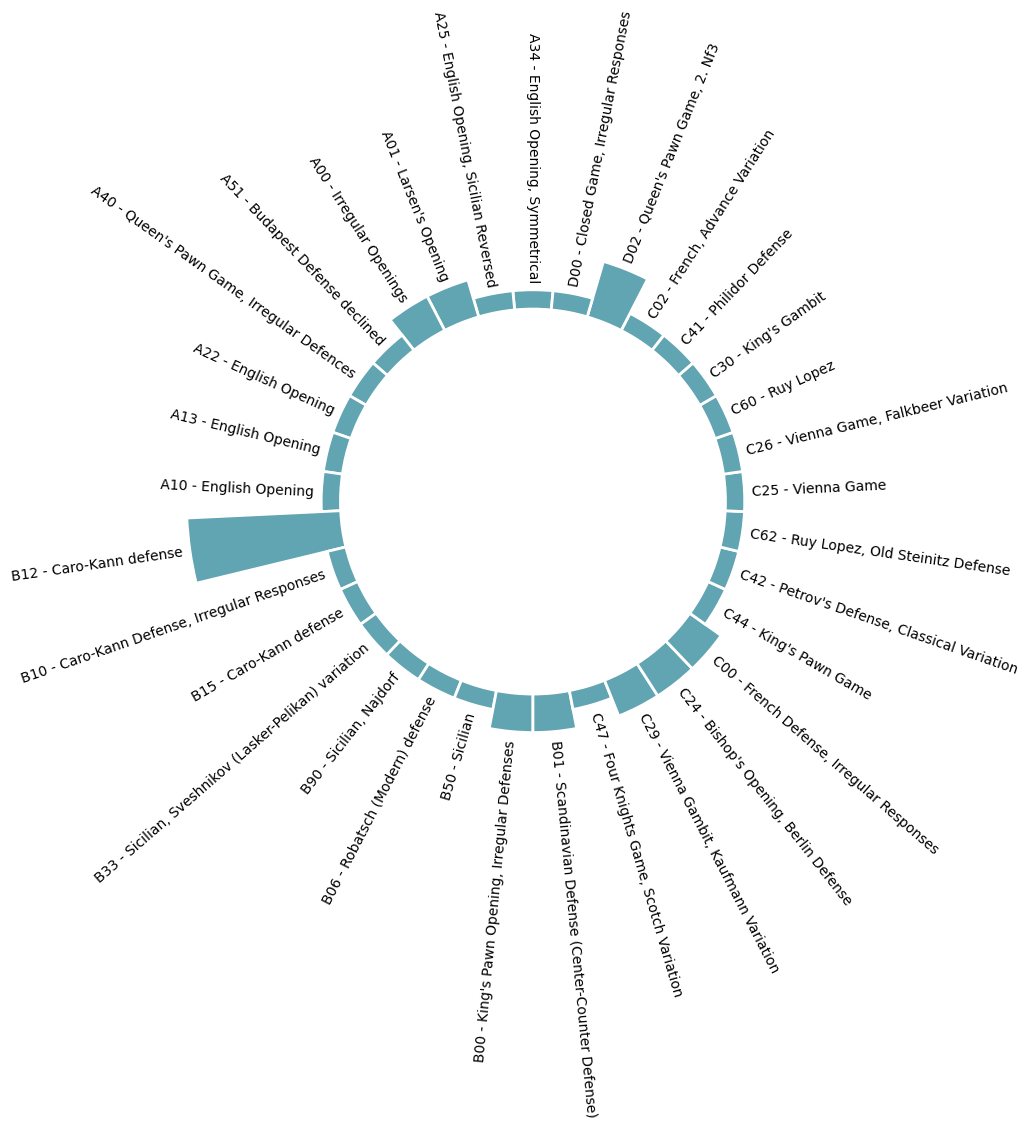

In [36]:
df = df_opening
ANGLES = np.linspace(0, 2 * np.pi, len(df), endpoint=False)
VALUES = df["count"].values * 10
LABELS = df["Apertura"].values

# Determine the width of each bar. 
# The circumference is '2 * pi', so we divide that total width over the number of bars.
WIDTH = 2 * np.pi / len(VALUES)

# Determines where to place the first bar. 
# By default, matplotlib starts at 0 (the first bar is horizontal)
# but here we say we want to start at pi/2 (90 deg)
OFFSET = np.pi / 2

# Initialize Figure and Axis
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": "polar"})

# Specify offset
ax.set_theta_offset(OFFSET)

# Set limits for radial (y) axis. The negative lower bound creates the whole in the middle.
ax.set_ylim(-100, 100)

# Remove all spines
ax.set_frame_on(False)

# Remove grid and tick marks
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

# Add bars
ax.bar(
    ANGLES, VALUES, width=WIDTH, linewidth=2,
    color="#61a4b2", edgecolor="white"
)

# Add labels
add_labels(ANGLES, VALUES, LABELS, OFFSET, ax)

In [37]:
df.value_counts(['ECO_cluster']).values.tolist()

[13, 9, 9, 2]

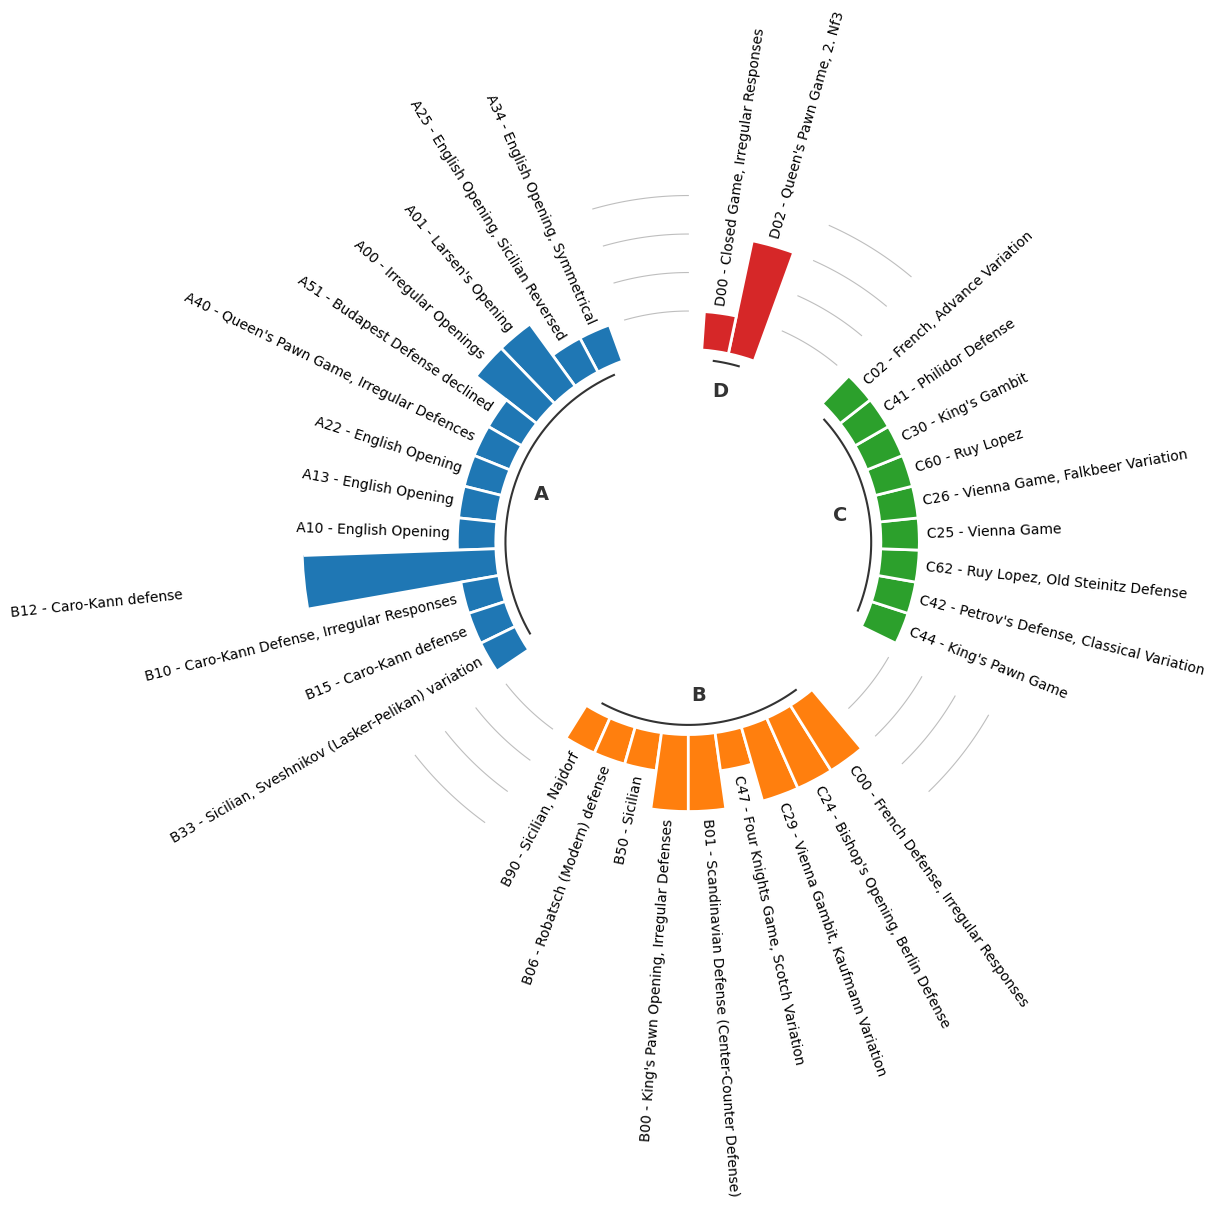

In [43]:
df = df_opening
# All this part is like the code above
VALUES = df["count"].values * 20
LABELS = df["Apertura"].values
GROUP = df["ECO_cluster"].values

PAD = 3
ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))
ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)

offset = 0
IDXS = []
GROUPS_SIZE = df.value_counts(['ECO_cluster']).values.tolist() #[10, 20, 12, 8]
for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD

fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": "polar"})
ax.set_theta_offset(OFFSET)
ax.set_ylim(-100, 100)
ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

#GROUPS_SIZE = df.value_counts(['ECO_cluster']).values.tolist() #[10, 20, 12, 8]
COLORS = [f"C{i}" for i, size in enumerate(GROUPS_SIZE) for _ in range(size)]

ax.bar(
    ANGLES[IDXS], VALUES, width=WIDTH, color=COLORS, 
    edgecolor="white", linewidth=2
)

add_labels(ANGLES[IDXS], VALUES, LABELS, OFFSET, ax)

# Extra customization below here --------------------

# This iterates over the sizes of the groups adding reference
# lines and annotations.

offset = 0 
for group, size in zip(["A", "B", "C", "D"], GROUPS_SIZE):
    # Add line below bars
    x1 = np.linspace(ANGLES[offset + PAD], ANGLES[offset + size + PAD - 1], num=50)
    ax.plot(x1, [-5] * 50, color="#333333")
    
    # Add text to indicate group
    ax.text(
        np.mean(x1), -20, group, color="#333333", fontsize=14, 
        fontweight="bold", ha="center", va="center"
    )
    
    # Add reference lines at 20, 40, 60, and 80
    x2 = np.linspace(ANGLES[offset], ANGLES[offset + PAD - 1], num=50)
    ax.plot(x2, [20] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [40] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [60] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [80] * 50, color="#bebebe", lw=0.8)
    
    offset += size + PAD
    
plt.savefig('distribuzione_partite.png')

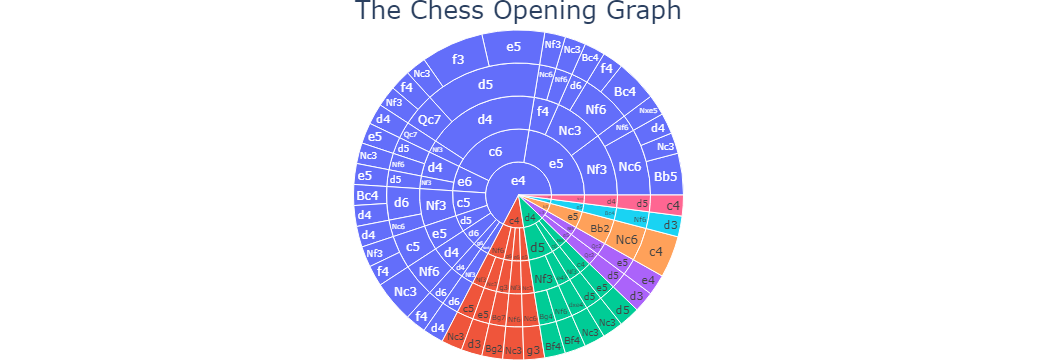

In [42]:
#https://www.reddit.com/r/chess/comments/gct9pd/new_version_of_chess_opening_graph_with_all/
import chess_graph
database = 'partite.pgn'
database = 'lichess_study_la-grande-azzuffata-2022_by_natopigro_2022.10.12.pgn'
database_clean = database+'_clean.pgn'

import re 
with open(database, 'r') as file:
  filedata = file.read()
filedata = re.sub("[\{\[].*?[\)\}]", "", filedata) #tolgo eval
filedata = re.sub("[\(\[].*?[\)\)]", "", filedata) #tolgo varanati
filedata = re.sub("\?\!", "", filedata) #tolgo varanati
with open(database_clean, 'w') as file:
  file.write(filedata)

chess_graph.graph(database_clean, depth=5, shade = False, fragmentation_percentage=0.0032, should_defragment=False, custom_branching=False, 
                  should_download = True, download_format = 'html', download_name = 'chess_opening_graph')

In [ ]:
#https://medium.com/analytics-vidhya/analyzing-chess-positions-with-python-26d73b7c892

In [1]:
import chess.pgn
import numpy as np
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import copy

import pandas as pd
from matplotlib.pyplot import figure

In [56]:
lookup_fen = {
    'p': np.array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=bool),
    'n': np.array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=bool),
    'b': np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=bool),
    'r': np.array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=bool),
    'q': np.array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=bool),
    'k': np.array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=bool),
    'P': np.array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=bool),
    'N': np.array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=bool),
    'B': np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=bool),
    'R': np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=bool),
    'Q': np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=bool),
    'K': np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=bool),
}

lookup_hot = {tuple(value): key for key, value in lookup_fen.items()}
lookup_hot[tuple([False for _ in range(12)])] =  None

def piecetovec(piece):
    return lookup_fen.get(piece, None)

def vectopiece(vec):
    return lookup_hot[tuple(vec)]

def fentohot(fen):
    iter = 0
    onehotboard = np.zeros((64, 12), dtype=bool)
    for p in fen:
        if p == ' ':
            break
        if p == '/':
            continue
        encoding = piecetovec(p)
        if encoding is not None:
            onehotboard[iter, :] = encoding
            iter = iter + 1
        else:
            iter = iter + int(p)

    return onehotboard

def hottofen(onehot):
    jter = 0
    fenboard = ''
    for iter in range(64):
        if iter % 8 == 0 and iter > 0:
            if jter > 0:
                fenboard += str(jter)
                jter = 0

            fenboard += '/'

        key = vectopiece(hot[iter, :])

        if key is not None:
            if not jter == 0:
                fenboard += str(jter)
                jter = 0

            fenboard += key
        else:
            jter += 1

    if not jter == 0:
        fenboard += str(jter)
        jter = 0
    
    return fenboard

piece_lookup = {'p': 0, 'n': 1, 'b': 2, 'r': 3, 'q': 4, 'k': 5, 'P': 6, 'N': 7, 'B': 8, 'R': 9, 'Q': 10, 'K': 11}
file_lookup = {'a': 7, 'b': 6, 'c': 5, 'd': 4, 'e': 3, 'f': 2, 'g': 1, 'h': 0}

def index_of(piece, file, rank):
    board_offset = rank*8 + file_lookup[file]
    piece_offset = piece_lookup[piece]
    return (64-board_offset)*12 - (12 - piece_offset)

def get_number_of_game_in_pgn(pgn, player=""):
    kk=0
    while True:
        try:
            game = chess.pgn.read_game(pgn)
        except UnicodeDecodeError:
            print('Cannot decode game')
            continue

        if game is None:
            break
        if game.headers["White"] == player or game.headers["Black"] == player or player == "":
            kk = kk+1
    return kk

def get_positions(pgn, player=''):
    iter=0
    positions = np.zeros((768, 100000), dtype=bool)
    pgn = open(database)
    while True:
        try:
            game = chess.pgn.read_game(pgn)
        except UnicodeDecodeError:
            print('Cannot decode game')
            continue

        if game is None:
            break
            
        if game.headers["White"] == player or player == "":      
            board = game.board()
            semimove = 0
            for move in game.mainline_moves():
                board.push(move)
                if semimove % 2 == 1: #è mossa del bianco
                    hot = fentohot(board.fen()).reshape((768,))
                    positions[:,iter] = hot
                iter = iter + 1
                if iter == positions.shape[1]:
                    positions = np.pad(positions, ((0, 0),(0, 10000)), 'constant', constant_values=(None, 0))
                
        if game.headers["Black"] == player or player == "":
            board = game.board()
            semimove = 0
            for move in game.mainline_moves():
                board.push(move)
                if semimove % 2 == 0: #è mossa del nero
                    hot = fentohot(board.fen()).reshape((768,))
                    positions[:,iter] = hot
                iter = iter + 1
                if iter == positions.shape[1]:
                    positions = np.pad(positions, ((0, 0),(0, 10000)), 'constant', constant_values=(None, 0))

    positions = positions[:, 0:iter]
    return positions

def plot_pieces_probability(positions, save_fig=False, player=''):
    flat_prob = np.mean(positions, (1,))
    flat_sum = np.sum(positions, (1,))
    positionprob = np.mean(positions, (1,)).reshape(64,12)

    title_lookup = {'p': 'Pawn', 'n': 'Knight', 'b': 'Bishop', 'r': 'Rook', 'q': 'Queen', 'k': 'King'}
    file_tick = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
    rank_tick = range(8,0,-1)

    norm = colors.LogNorm(vmin=1e-4, vmax=1e-1) 
    cmap = copy.copy(matplotlib.cm.get_cmap('coolwarm'))
    cmap.set_bad(cmap(0))

    fig, ax = plt.subplots(4,3)
    fig.set_figheight(15)
    fig.set_figwidth(15)

    iter = 0
    for key in piece_lookup:
        this_ax = ax[np.unravel_index(iter, (4,3))]
        iter = iter+1

        color = 'Black' if (key.islower()) else 'White'

        title = color + ' ' + title_lookup[key.lower()]

        to_show = positionprob[:,piece_lookup[key]].reshape(8,8)

        im = this_ax.imshow(to_show, cmap=cmap, norm=norm)
        this_ax.set_xticks(np.arange(len(file_tick)))
        this_ax.set_yticks(np.arange(len(rank_tick)))
        this_ax.set_xticklabels(file_tick)
        this_ax.set_yticklabels(rank_tick)

        this_ax.set_title(title)

        fig.subplots_adjust(right=0.8)
        cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])

    cbar = fig.colorbar(im, cax=cbar_ax, extend='both')
    cbar.set_label('Probability of Piece Position', rotation=270, fontsize=36, labelpad=40)
    cbar.minorticks_on()

    if player=='':
        fig.suptitle('Probability of Chess Piece Positions', fontsize=36)
    else:
        fig.suptitle('Probability of Chess Piece Positions \n' + player, fontsize=36)
    
    if save_fig:
        if player=='':
            plt.savefig('pieces_probability.png')
        else:
            plt.savefig('pieces_probability_'+player+'.png')

    plt.show()

In [50]:
pgn = open(database)
game = chess.pgn.read_game(pgn)
game = chess.pgn.read_game(pgn)
game.headers["White"]

'Giampaolo Camera'

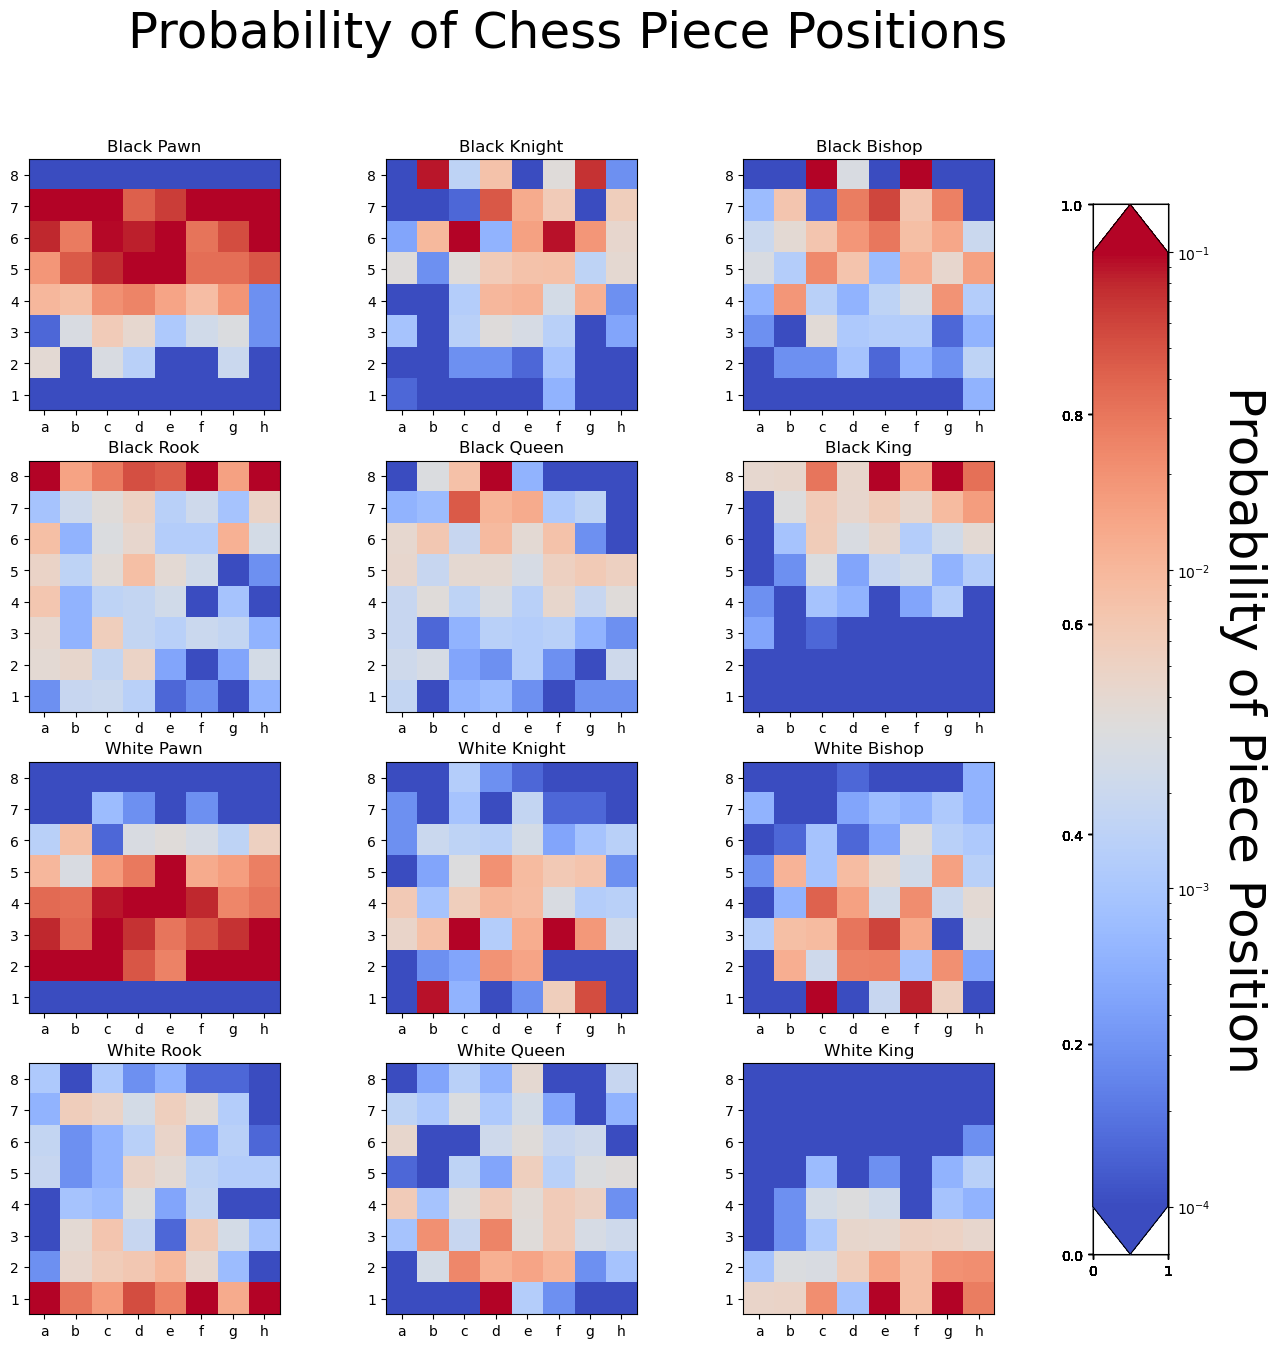

In [58]:
positions = get_positions(pgn)
plot_pieces_probability(positions, save_fig=True)   

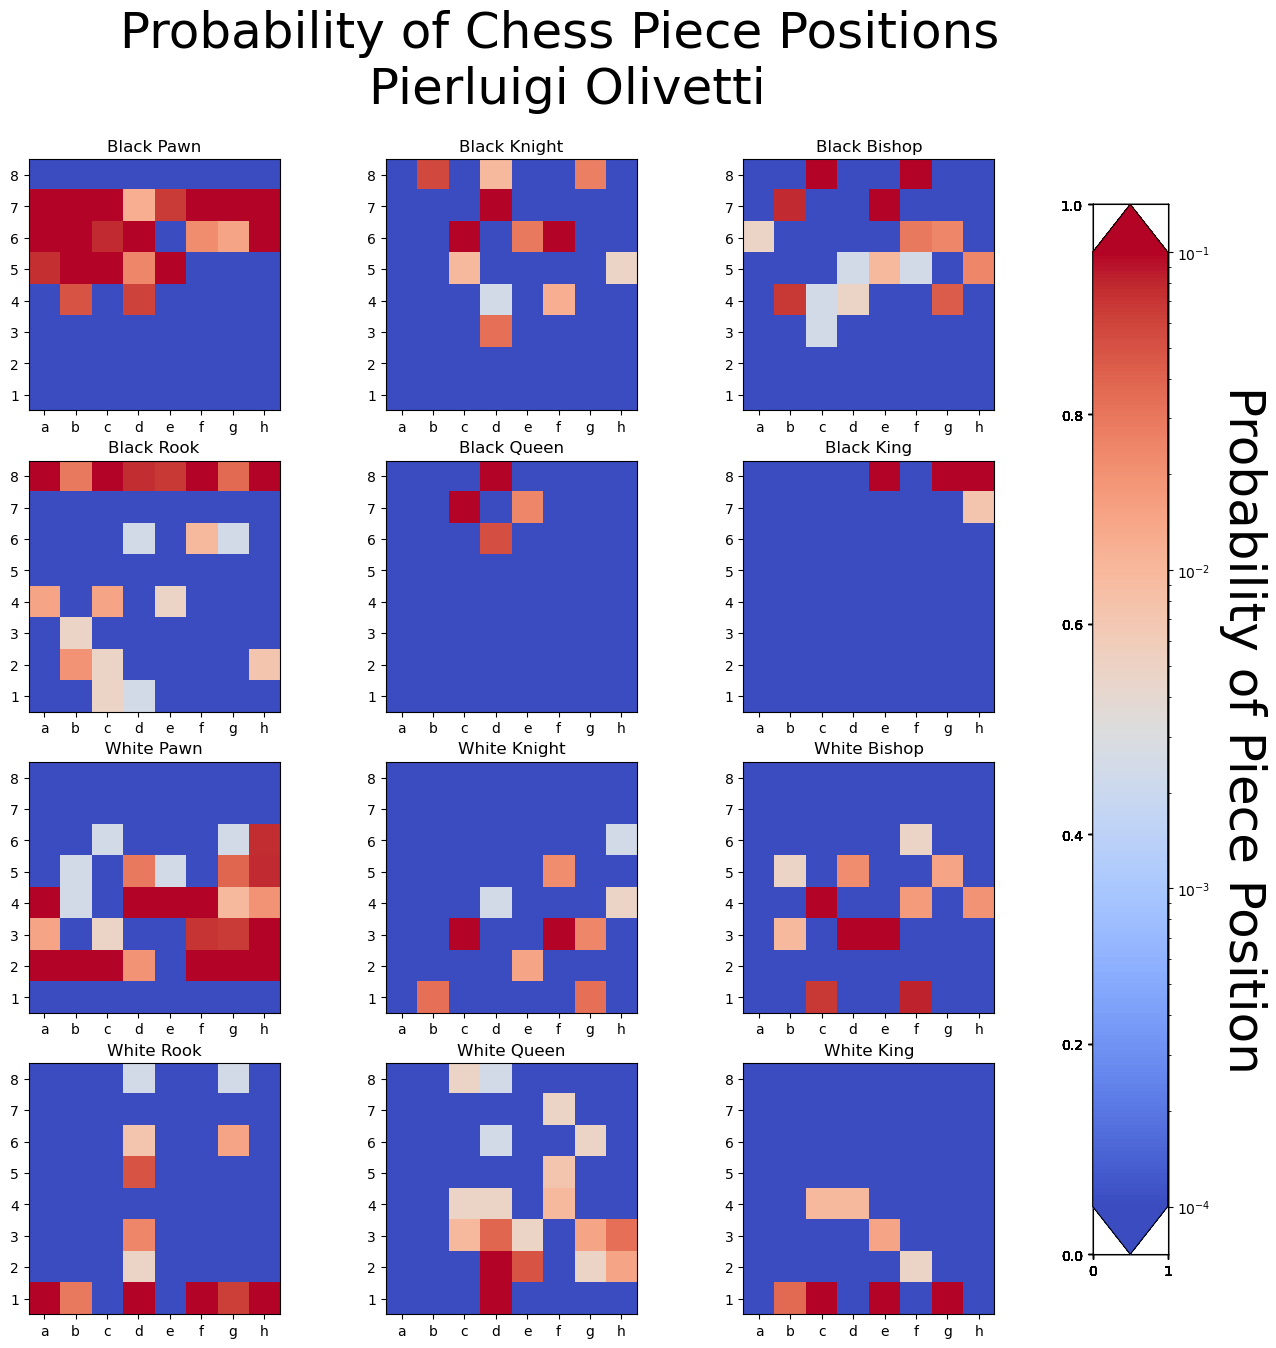

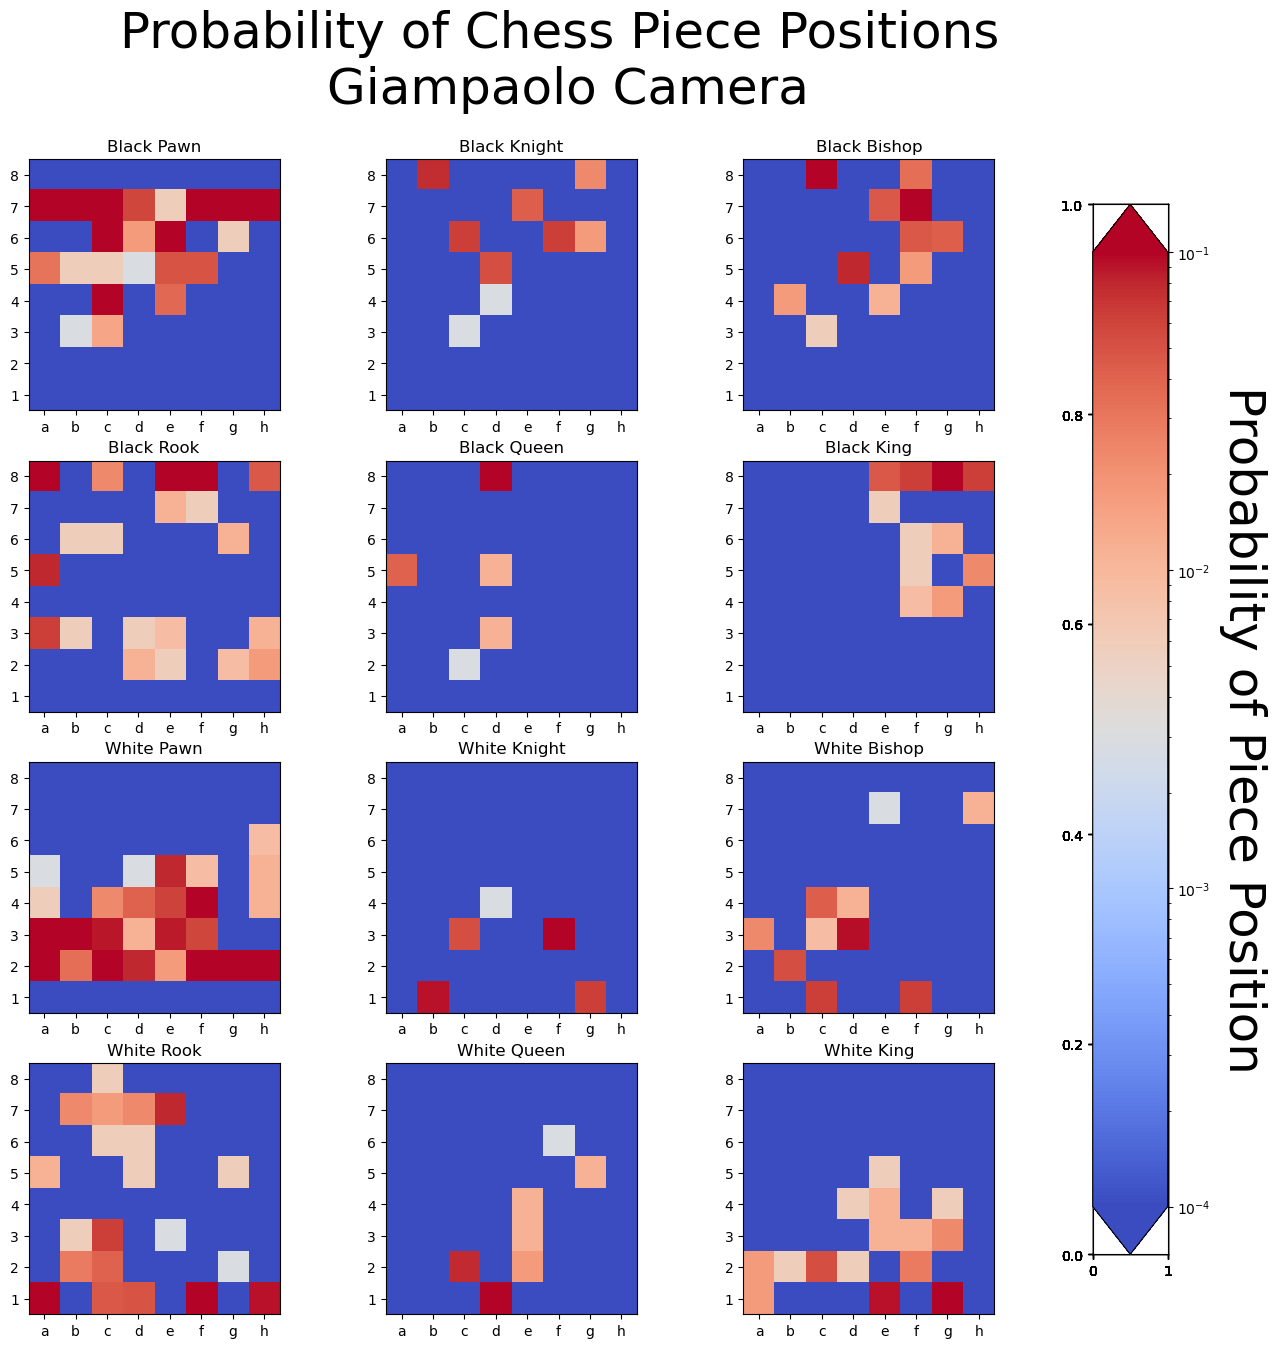

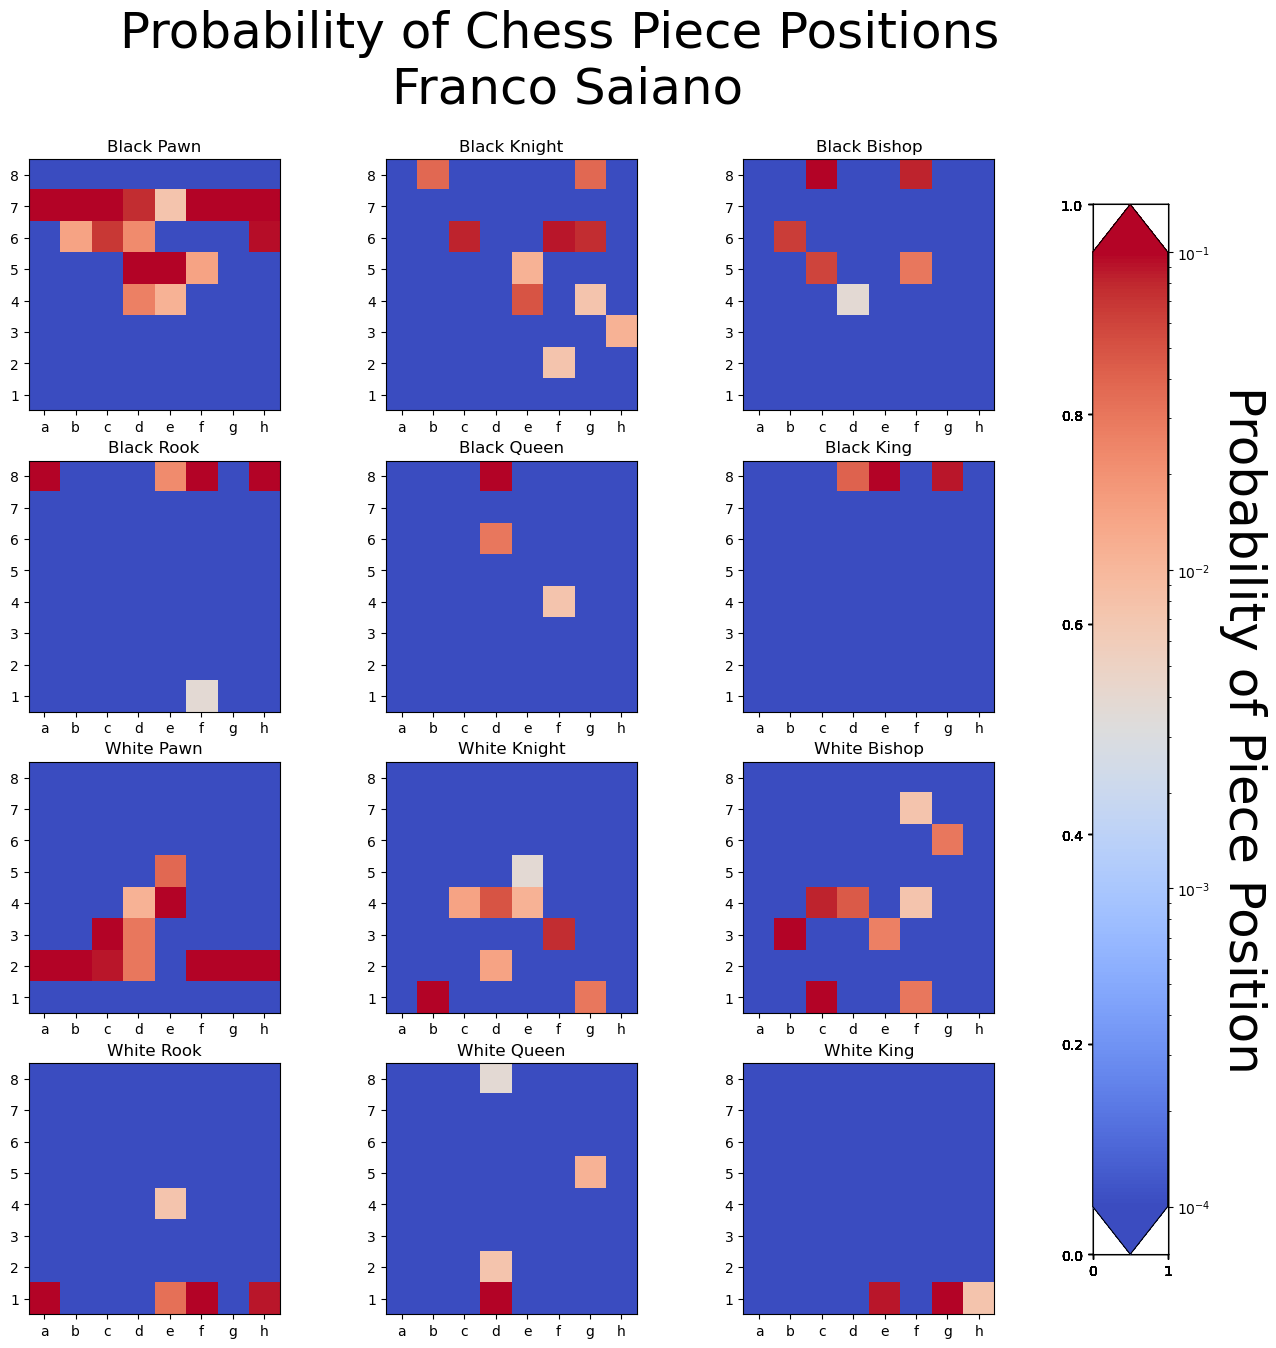

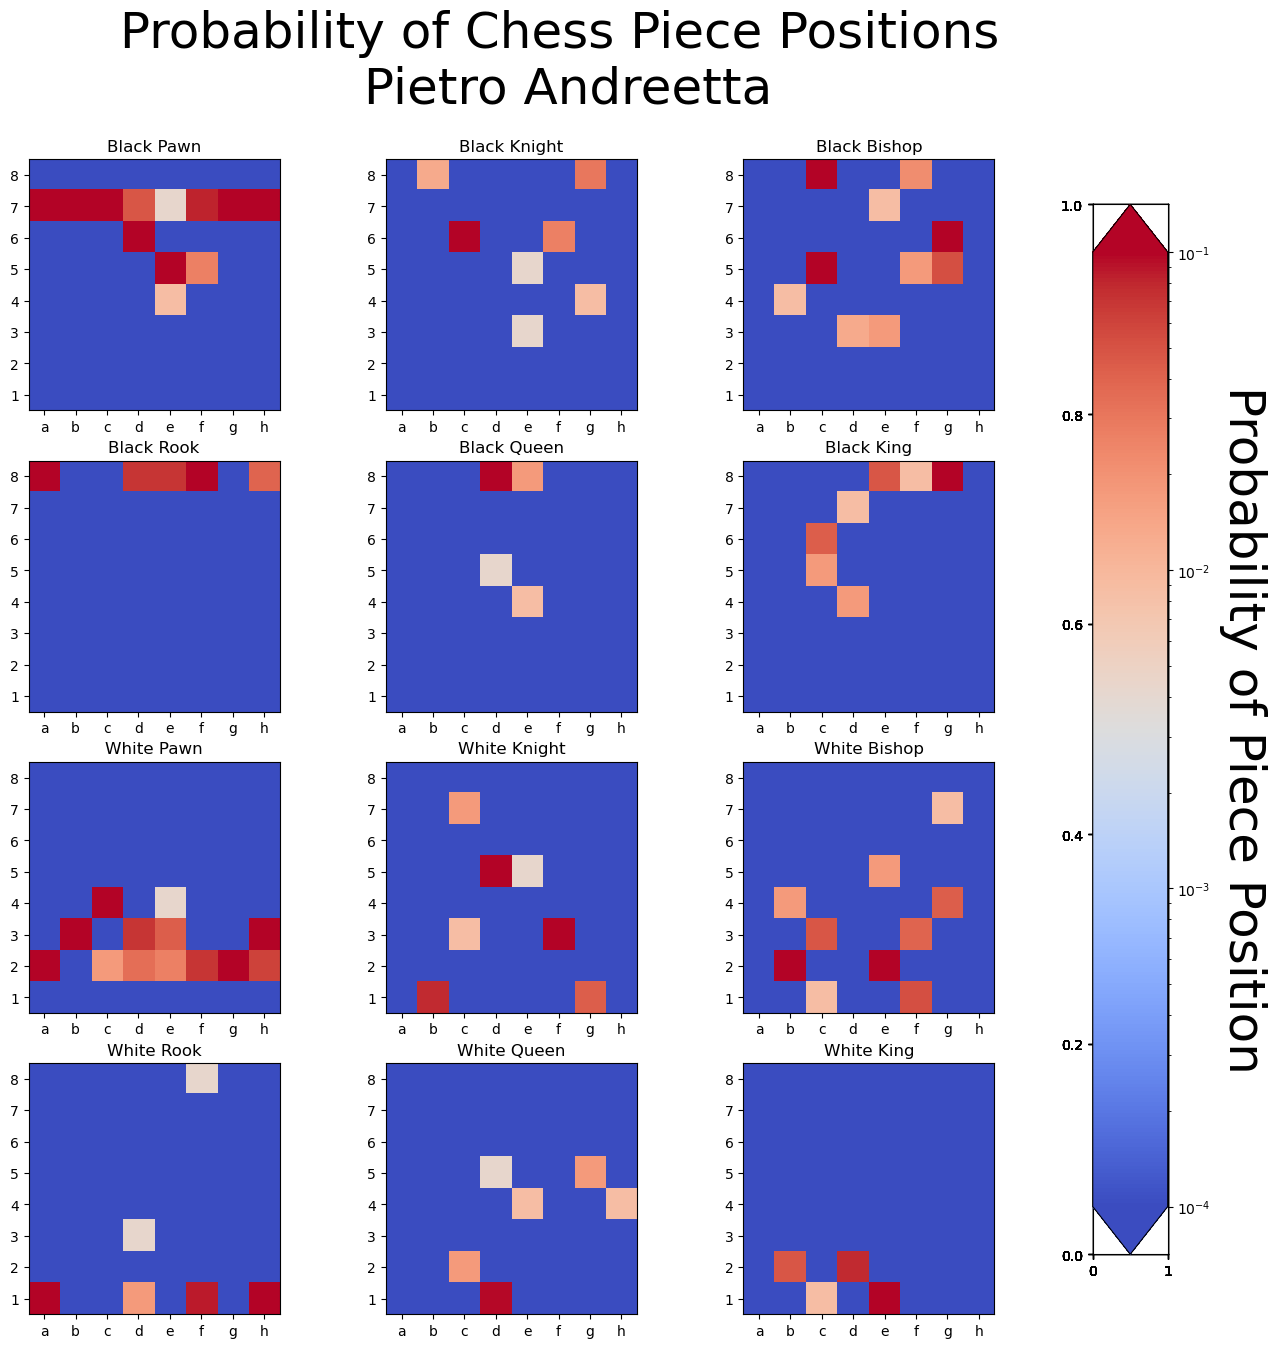

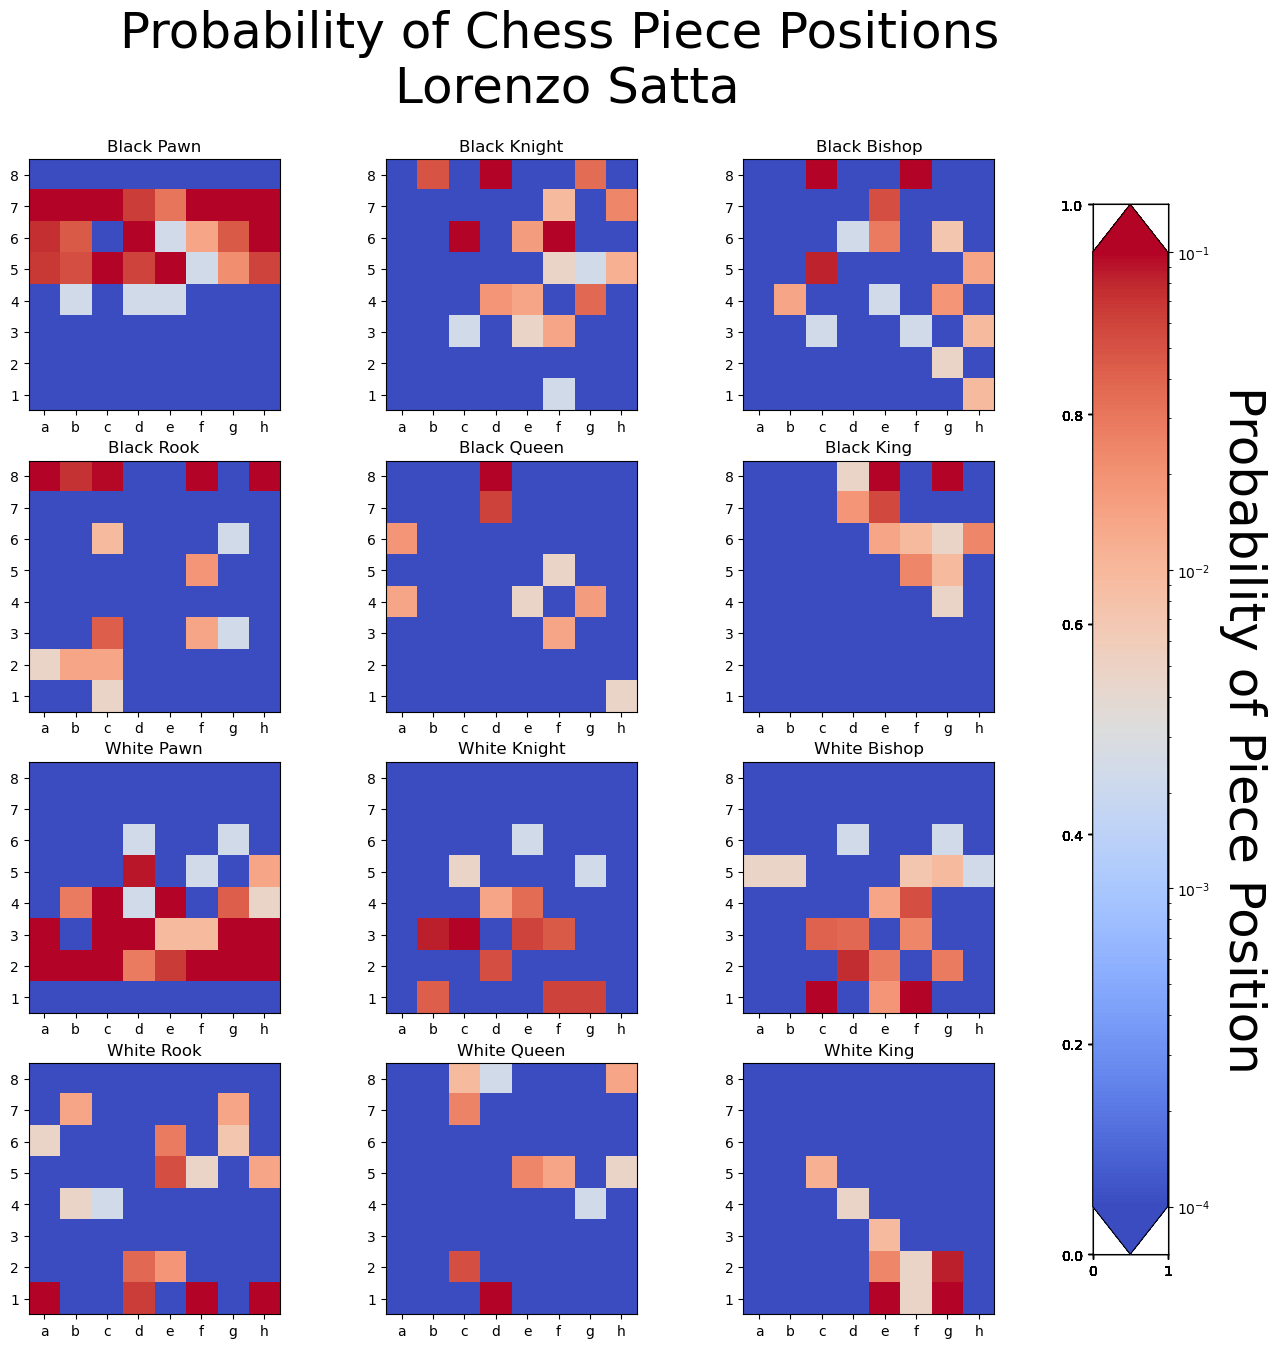

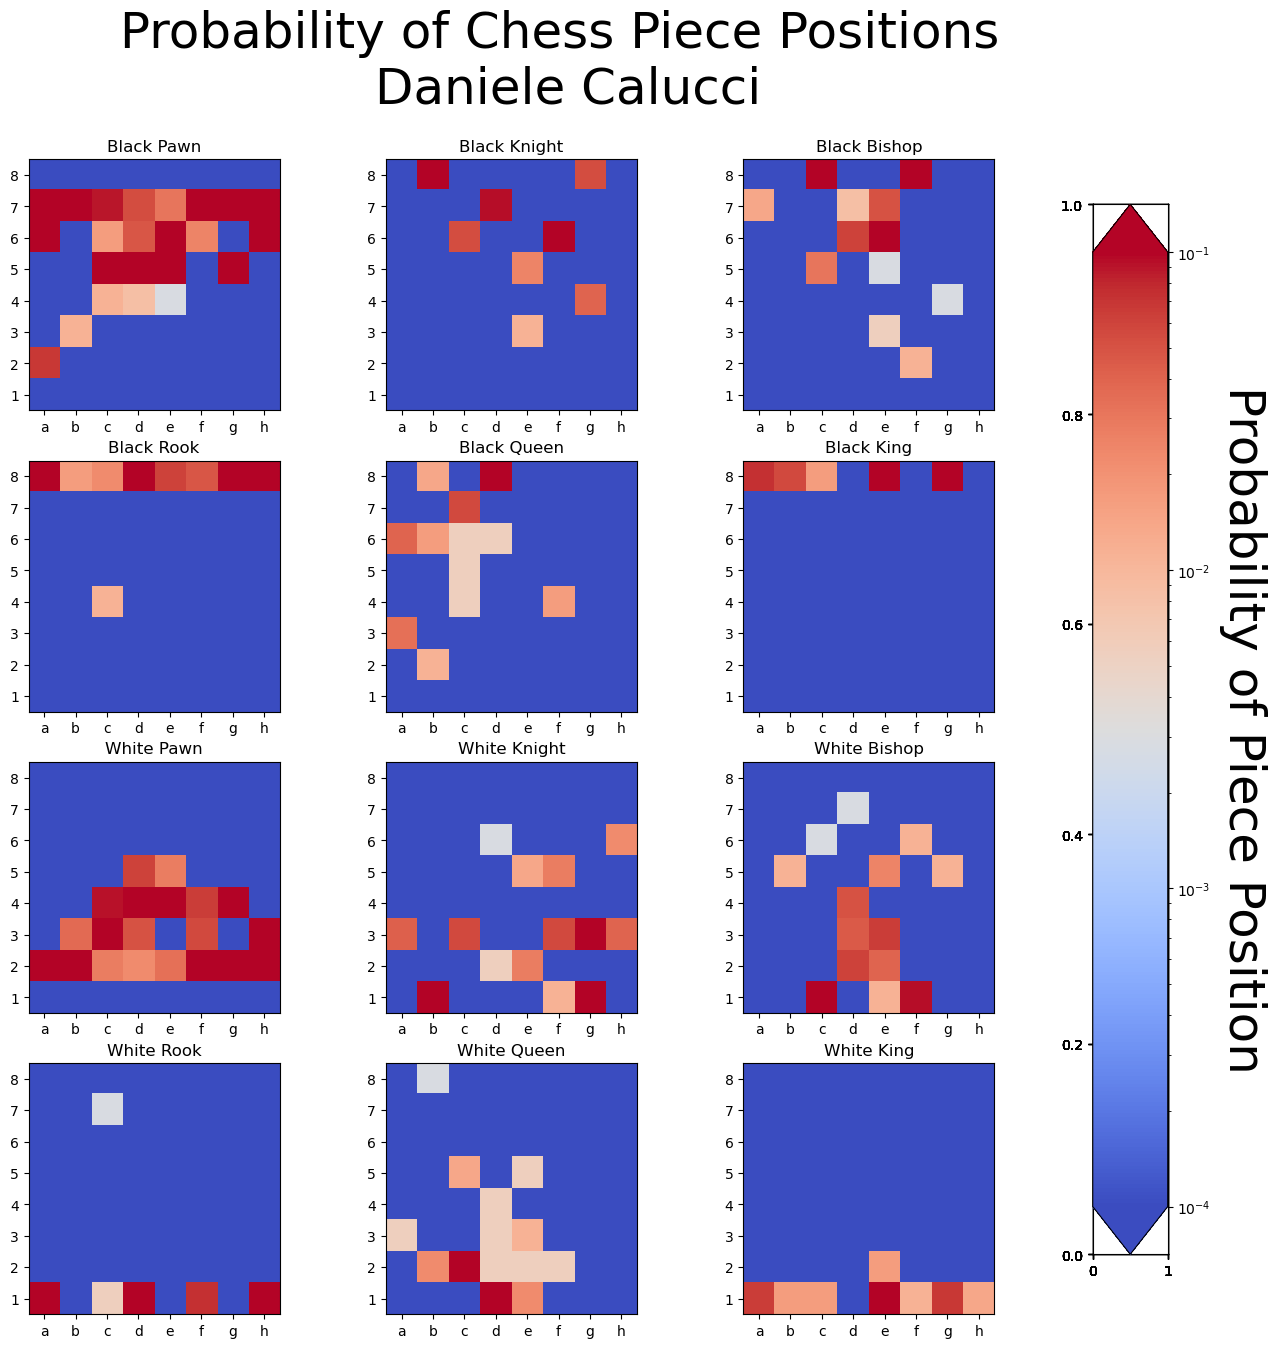

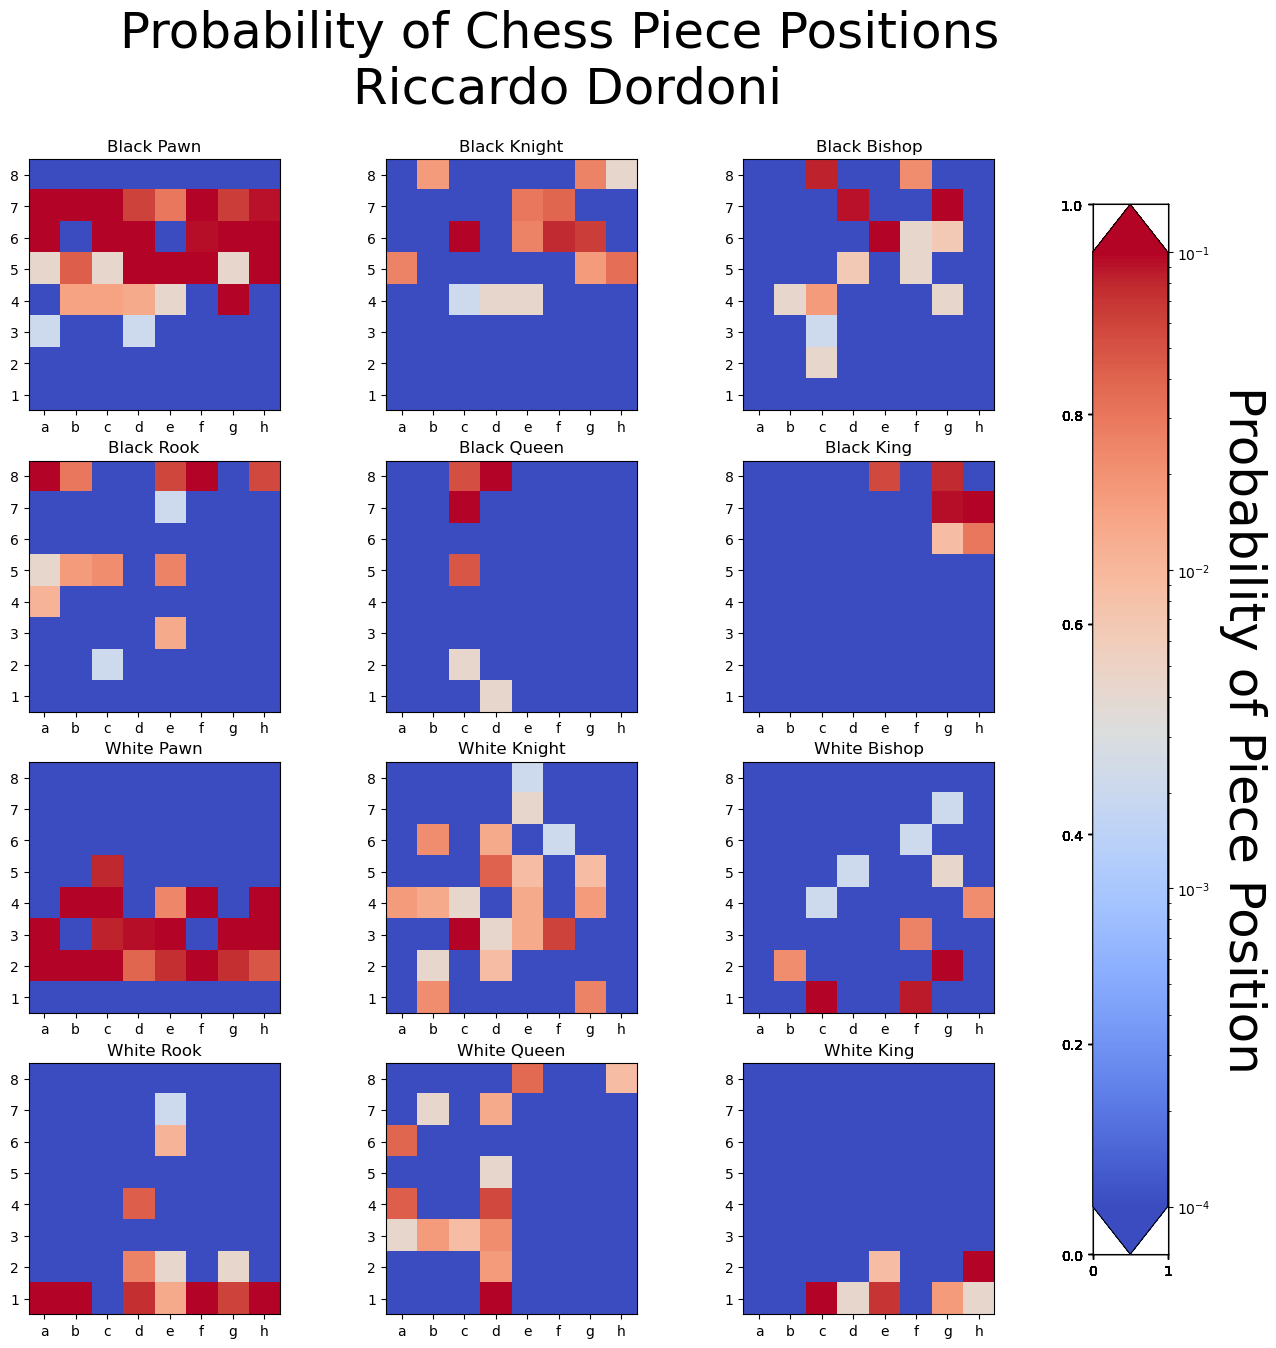

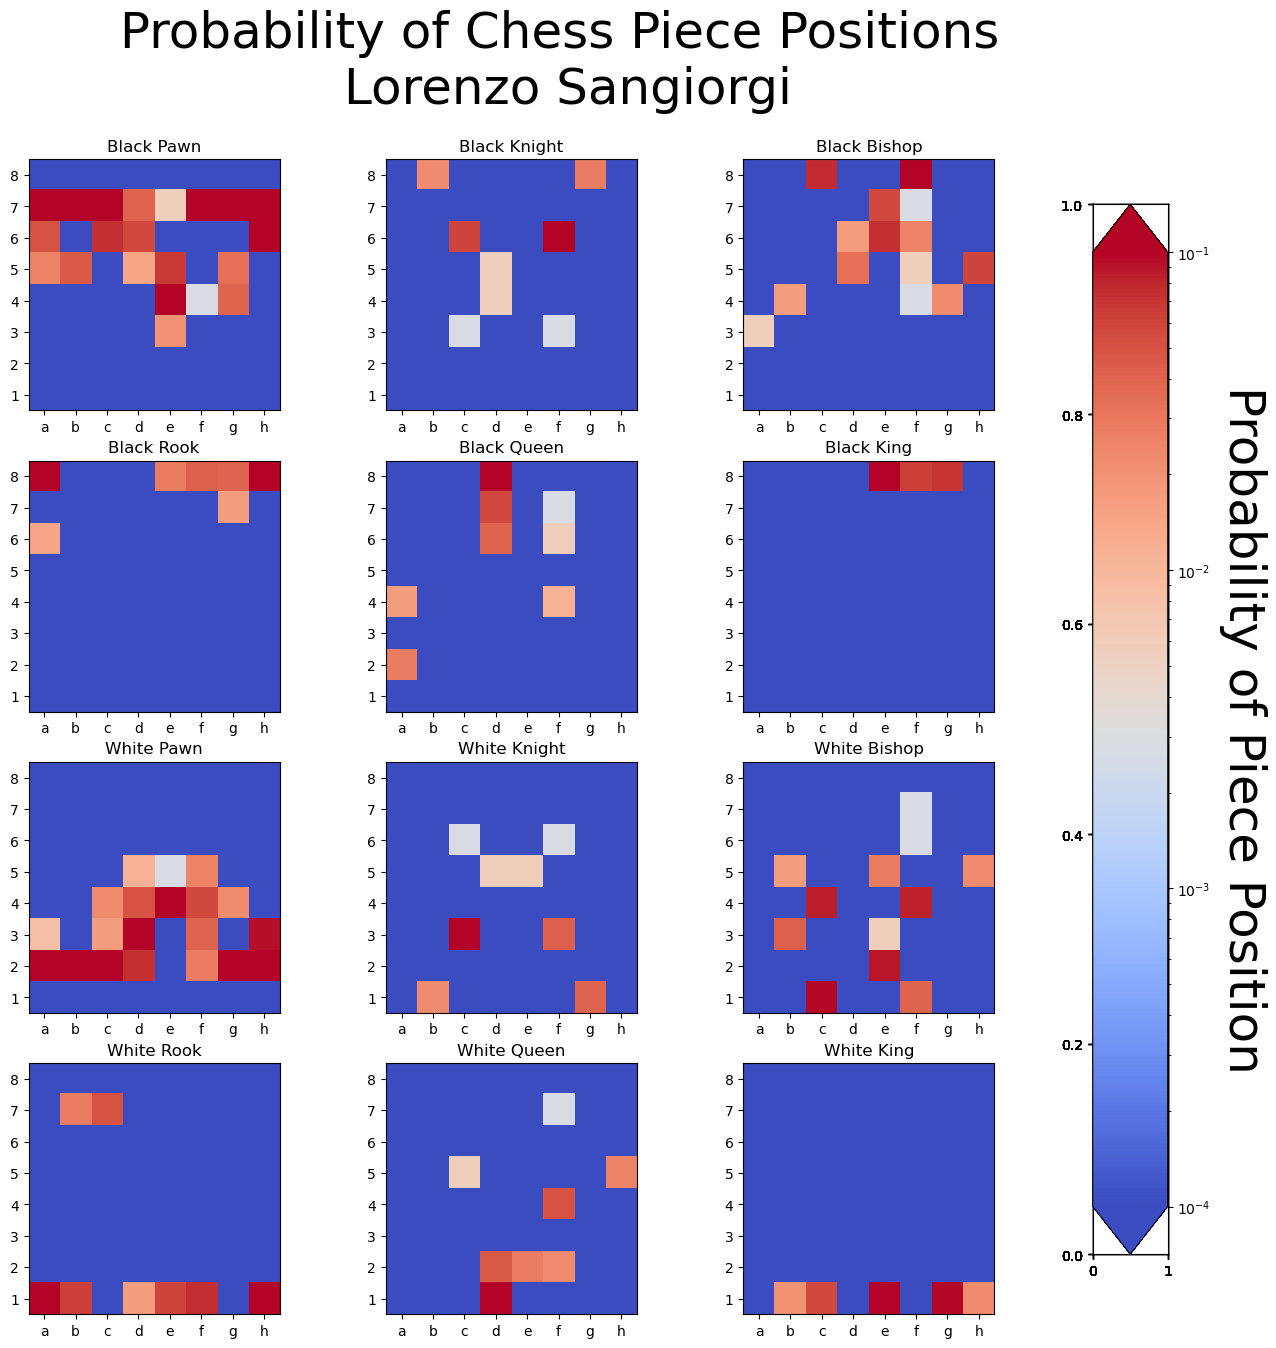

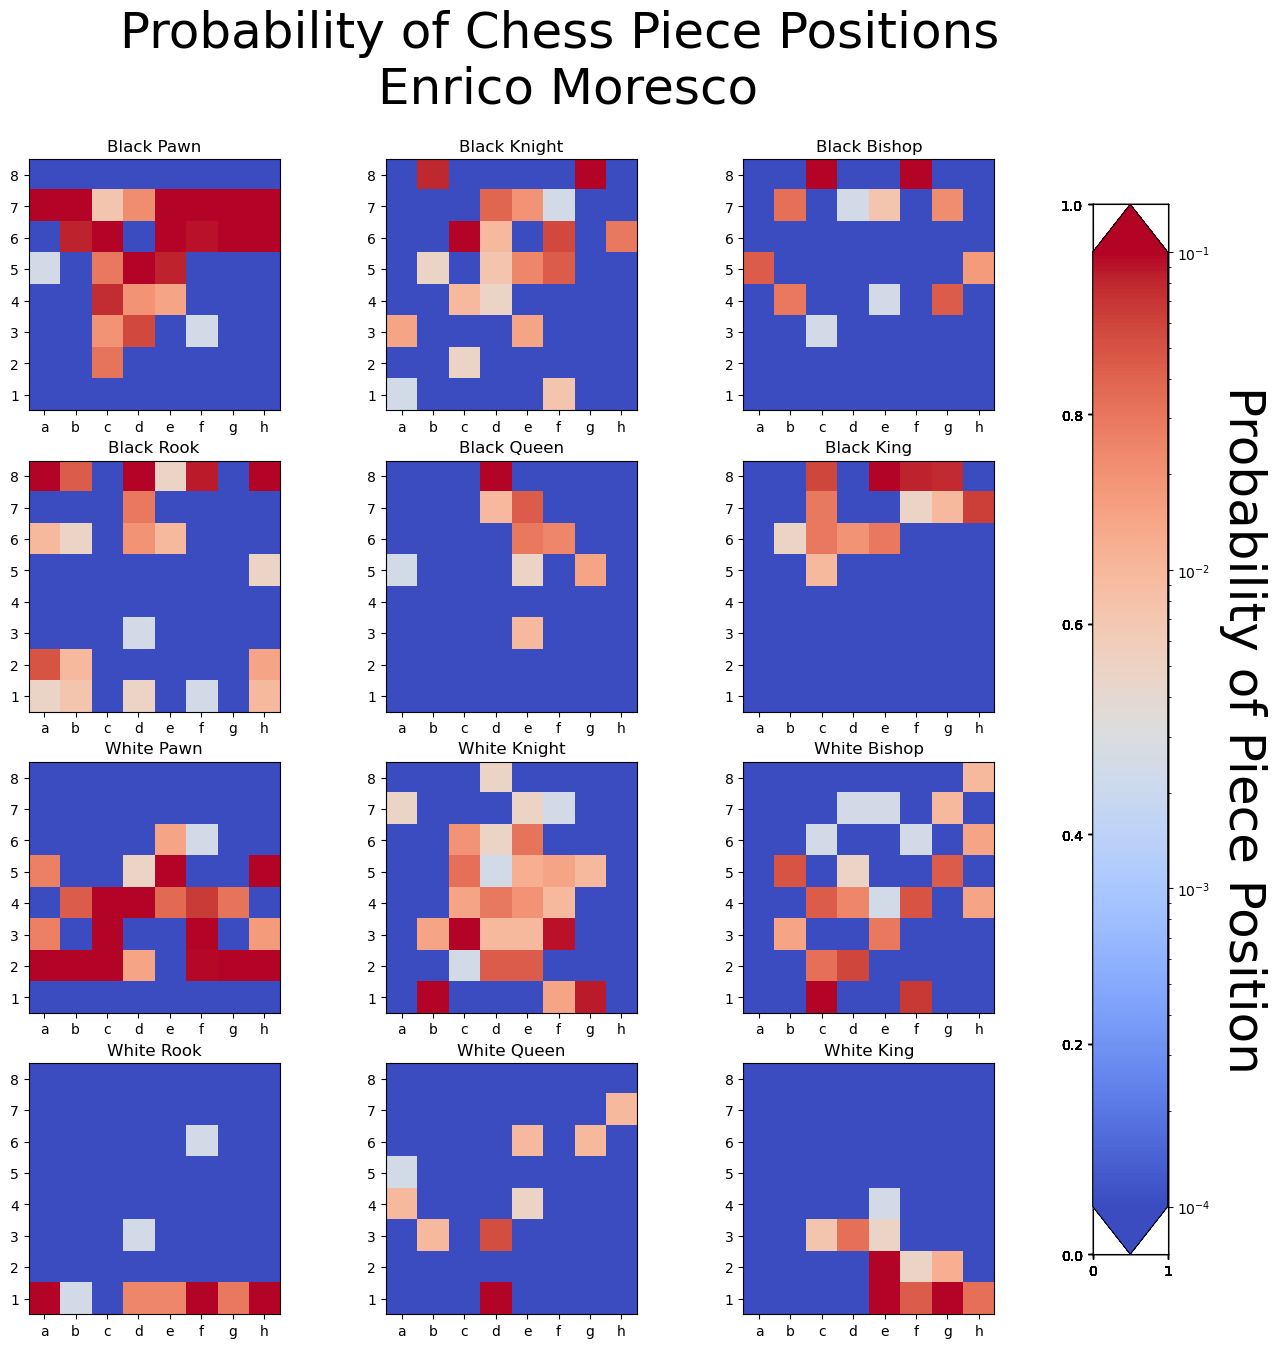

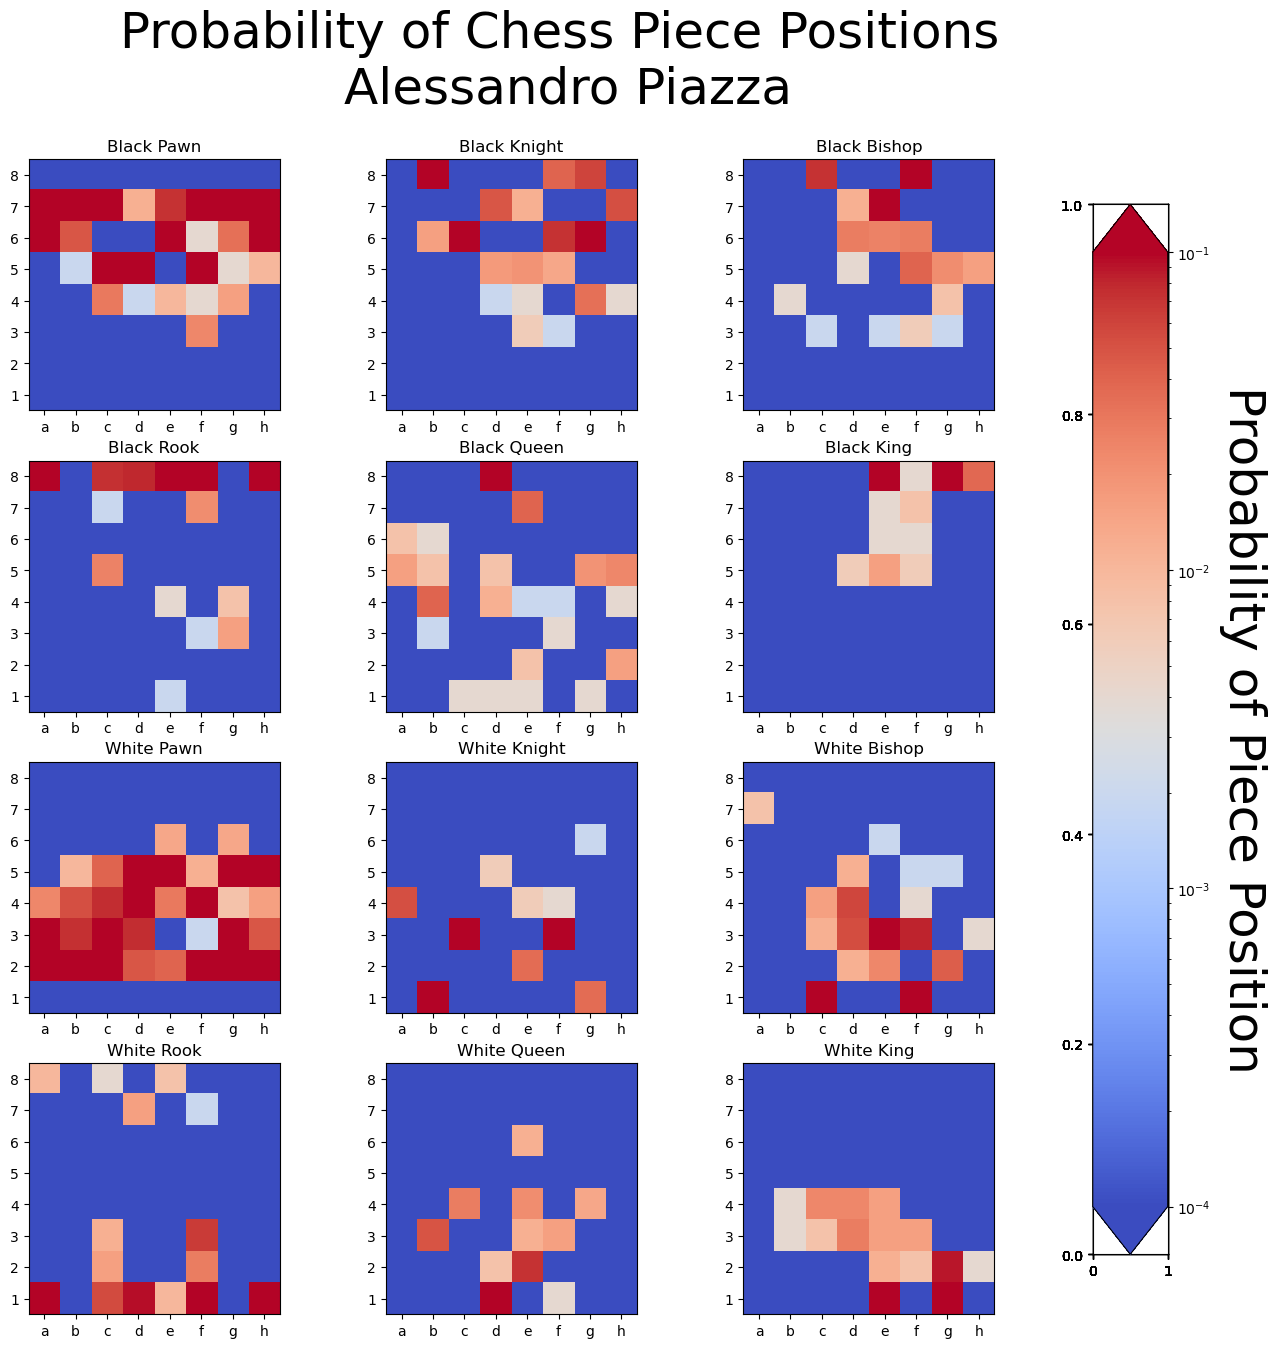

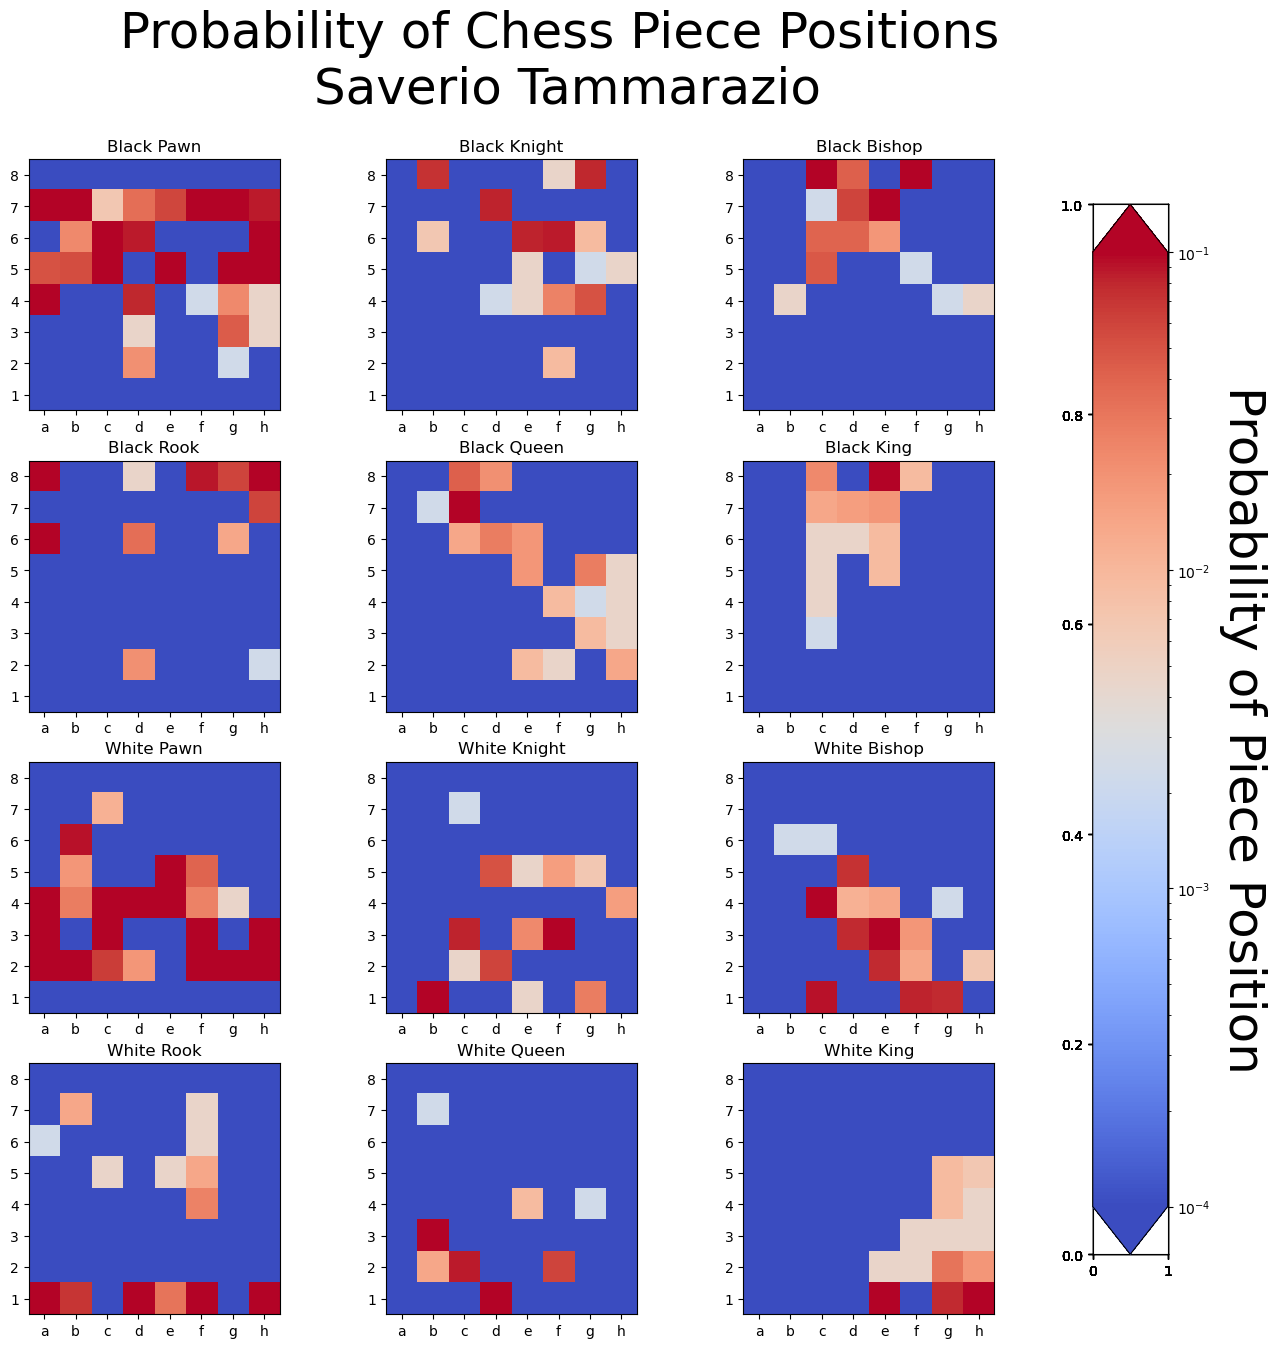

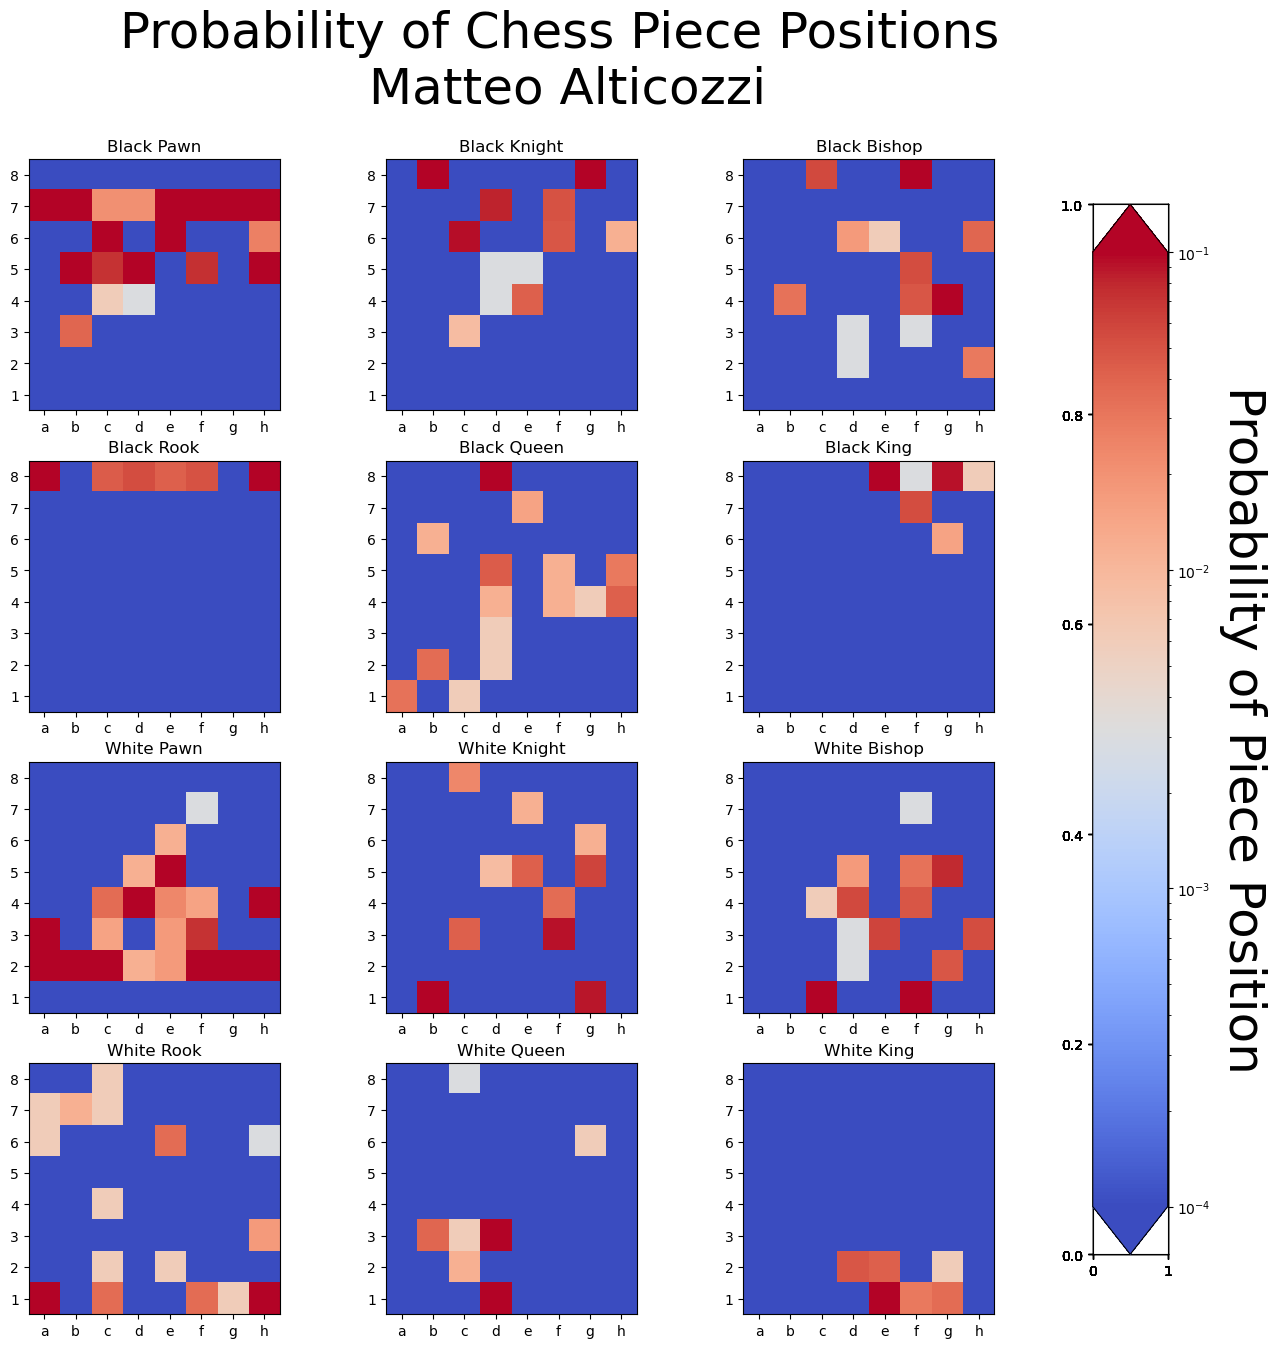

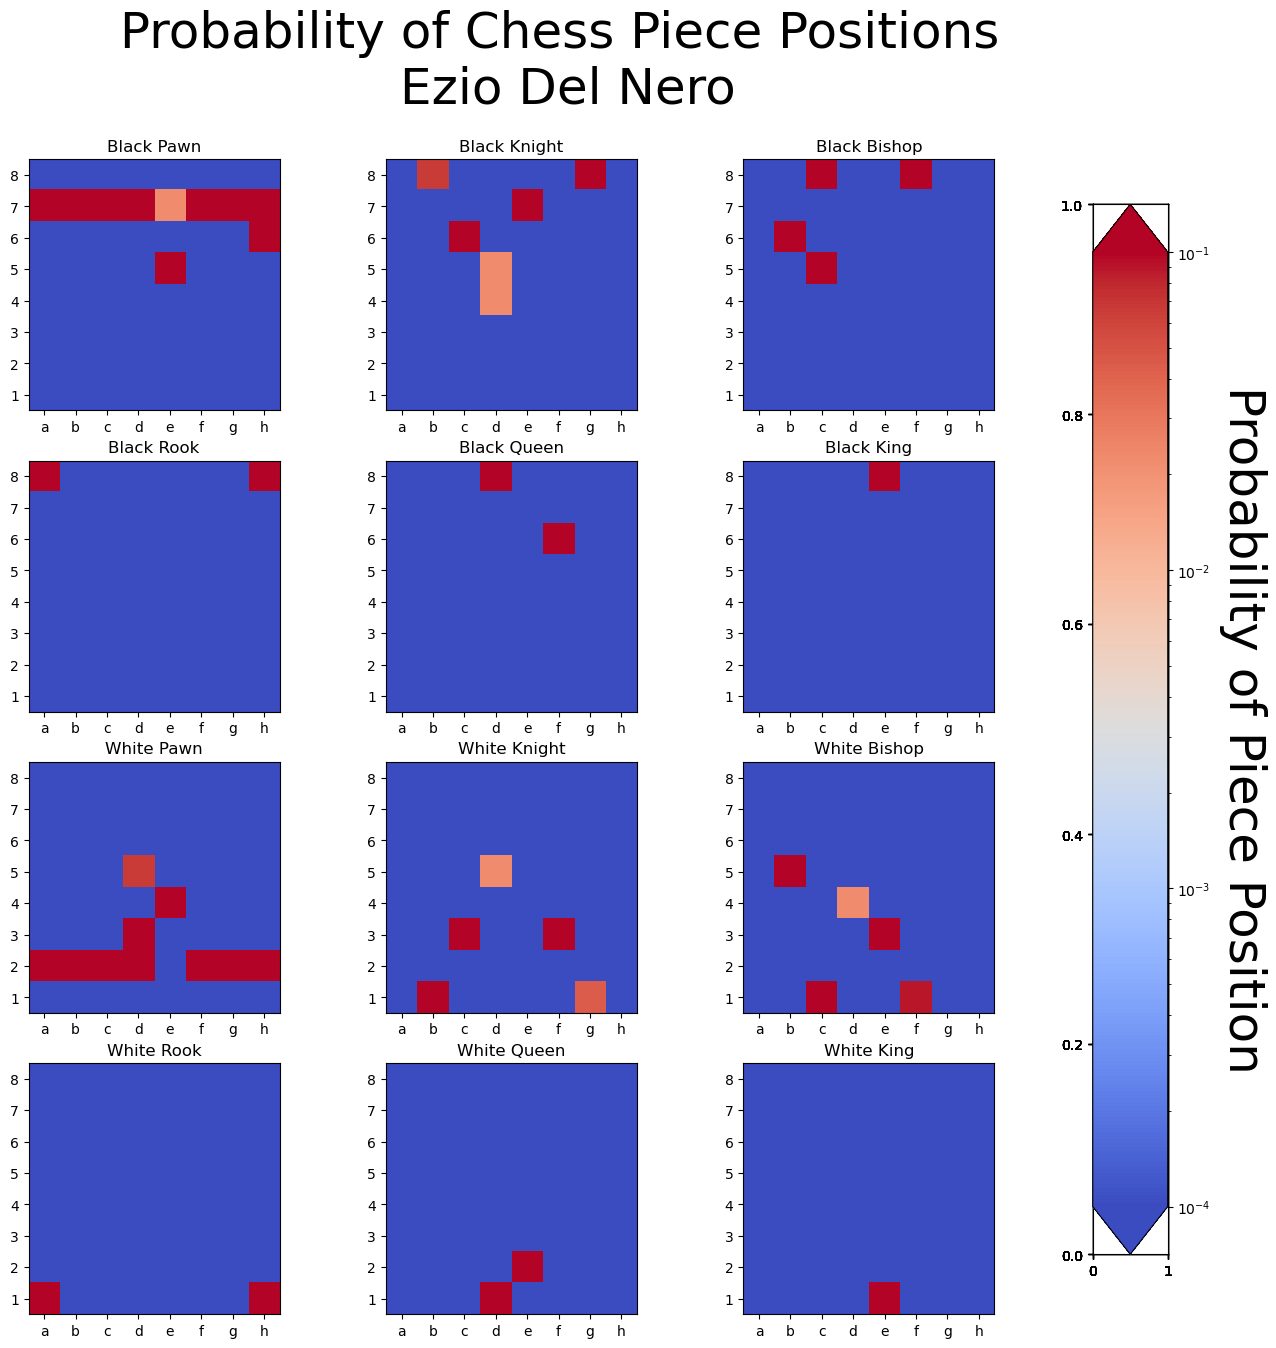

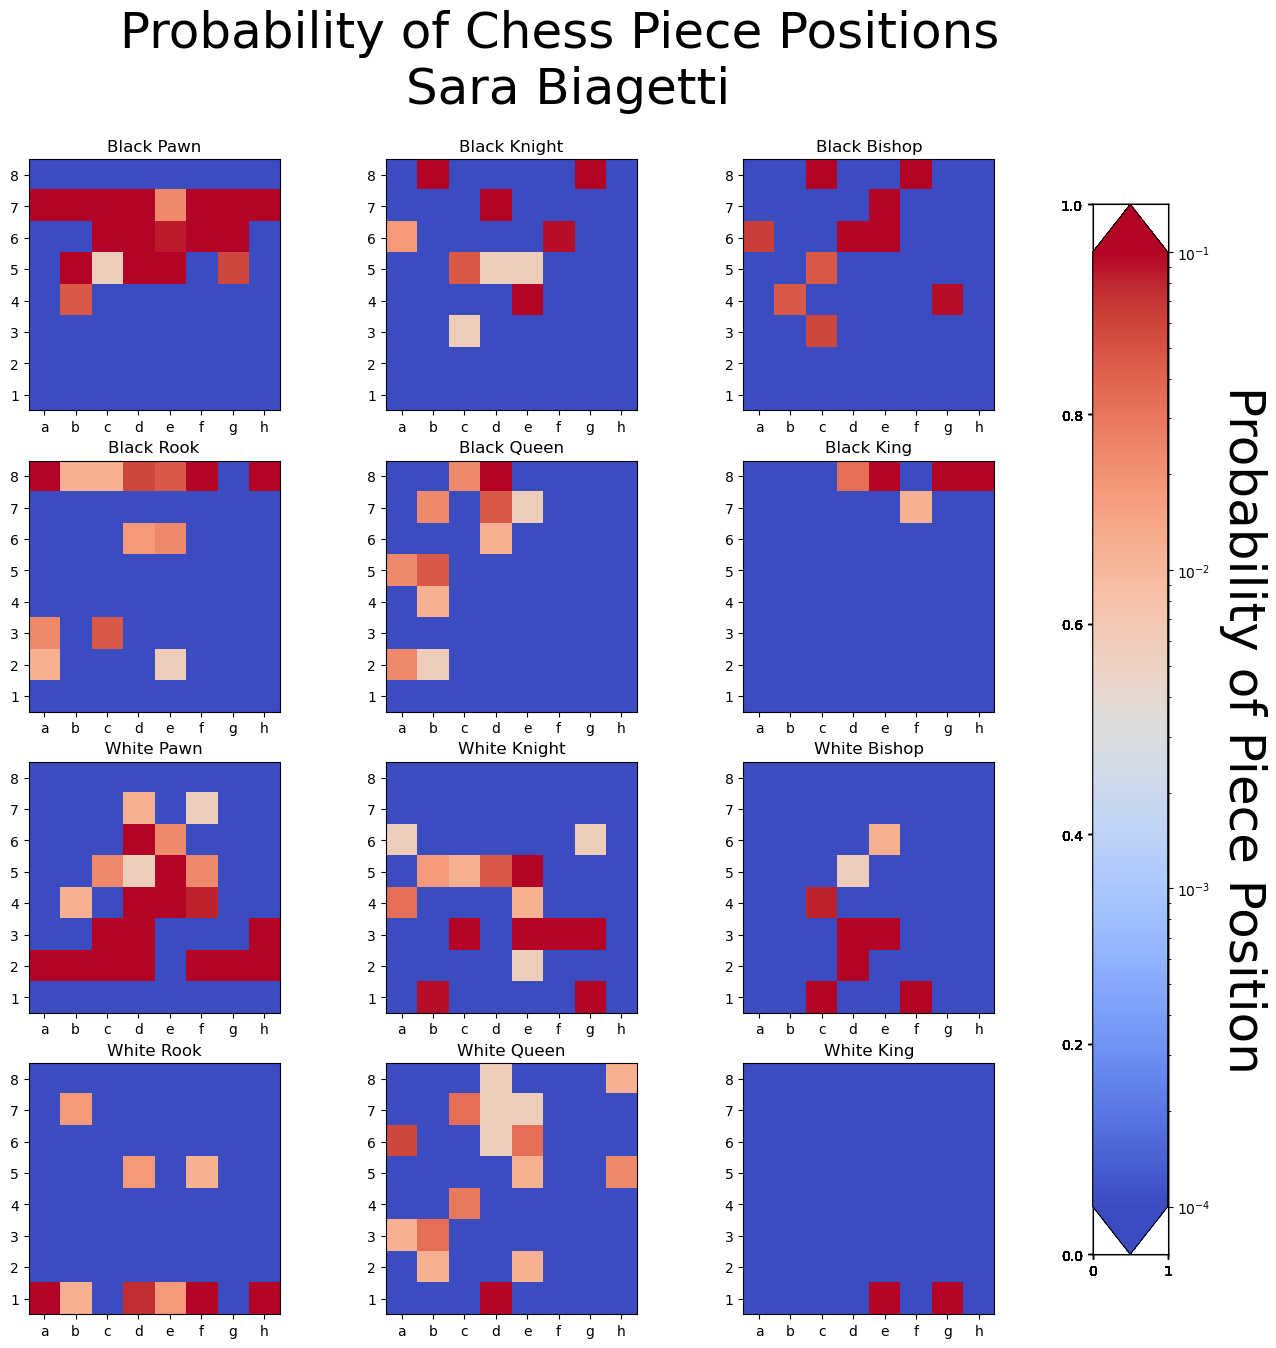

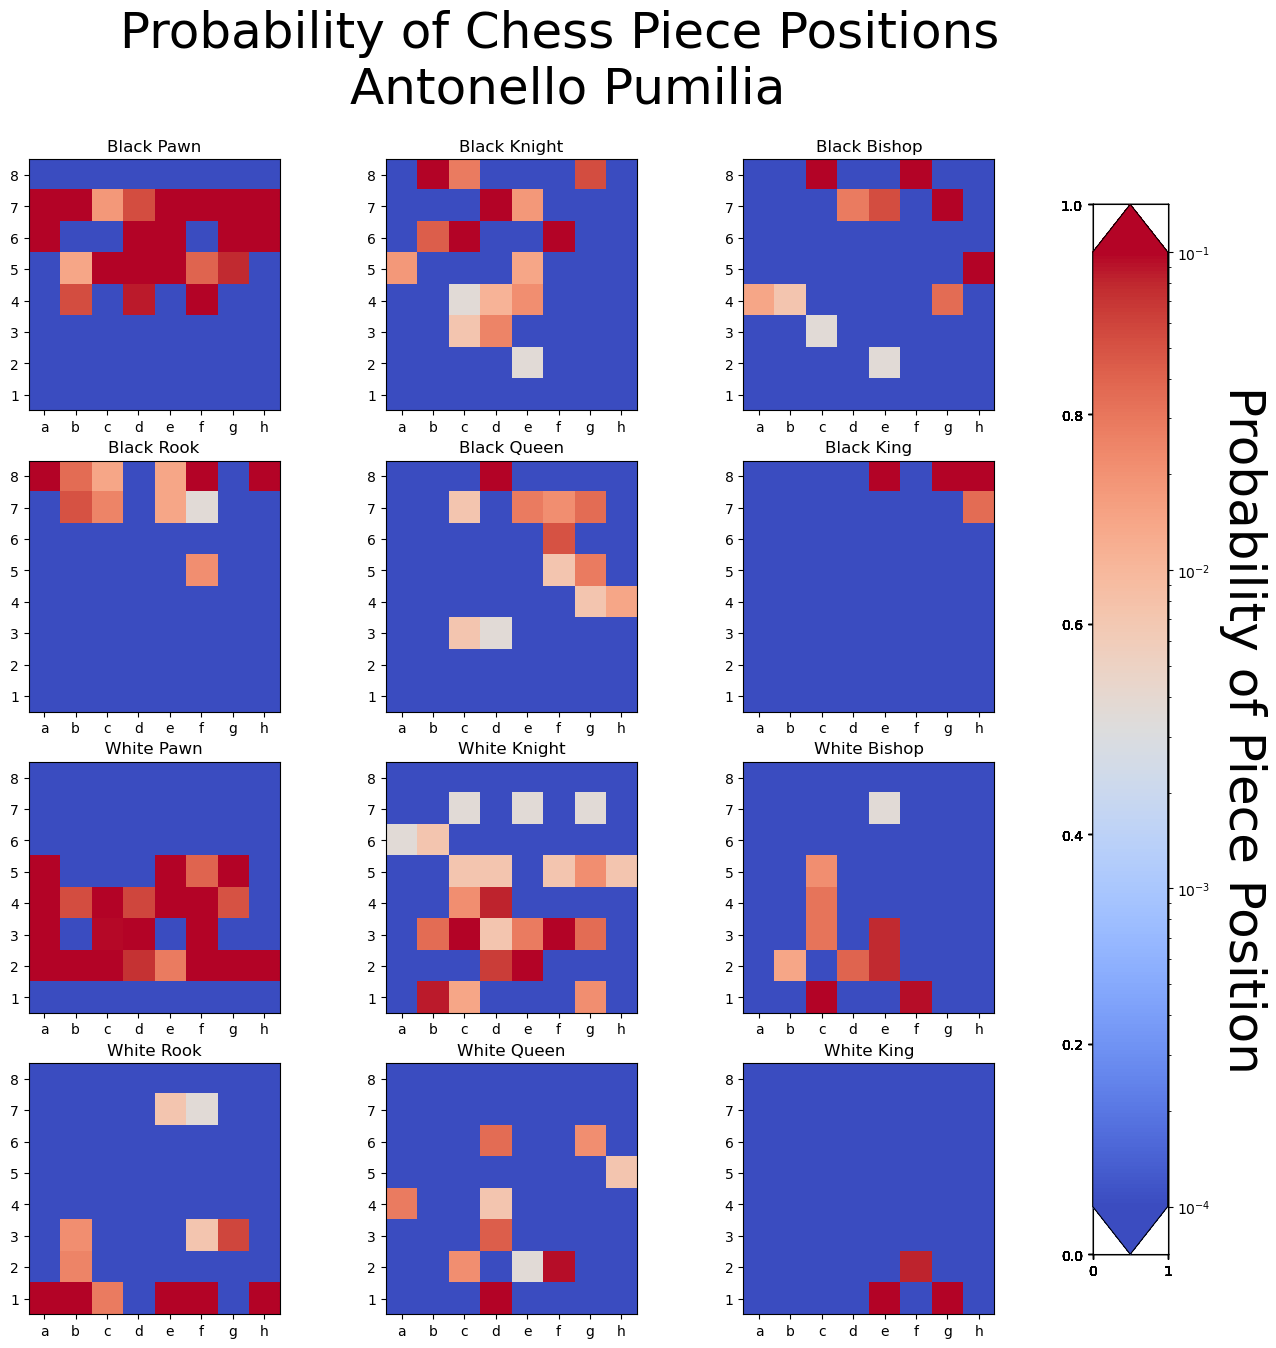

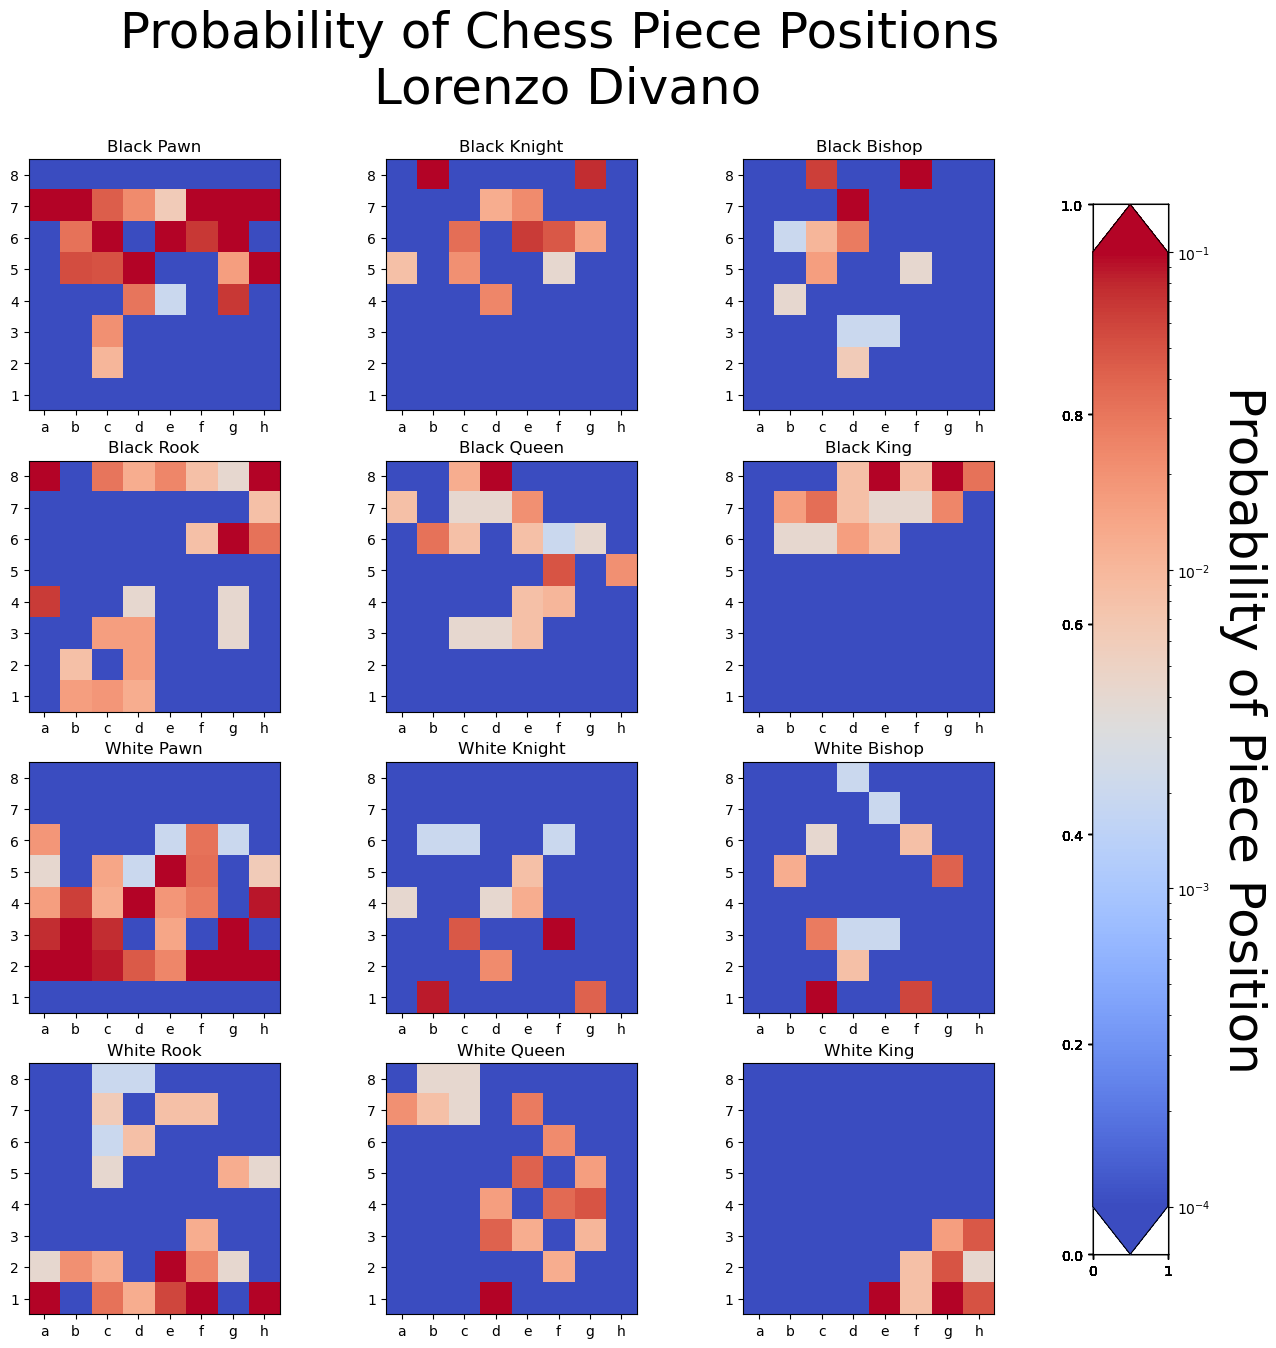

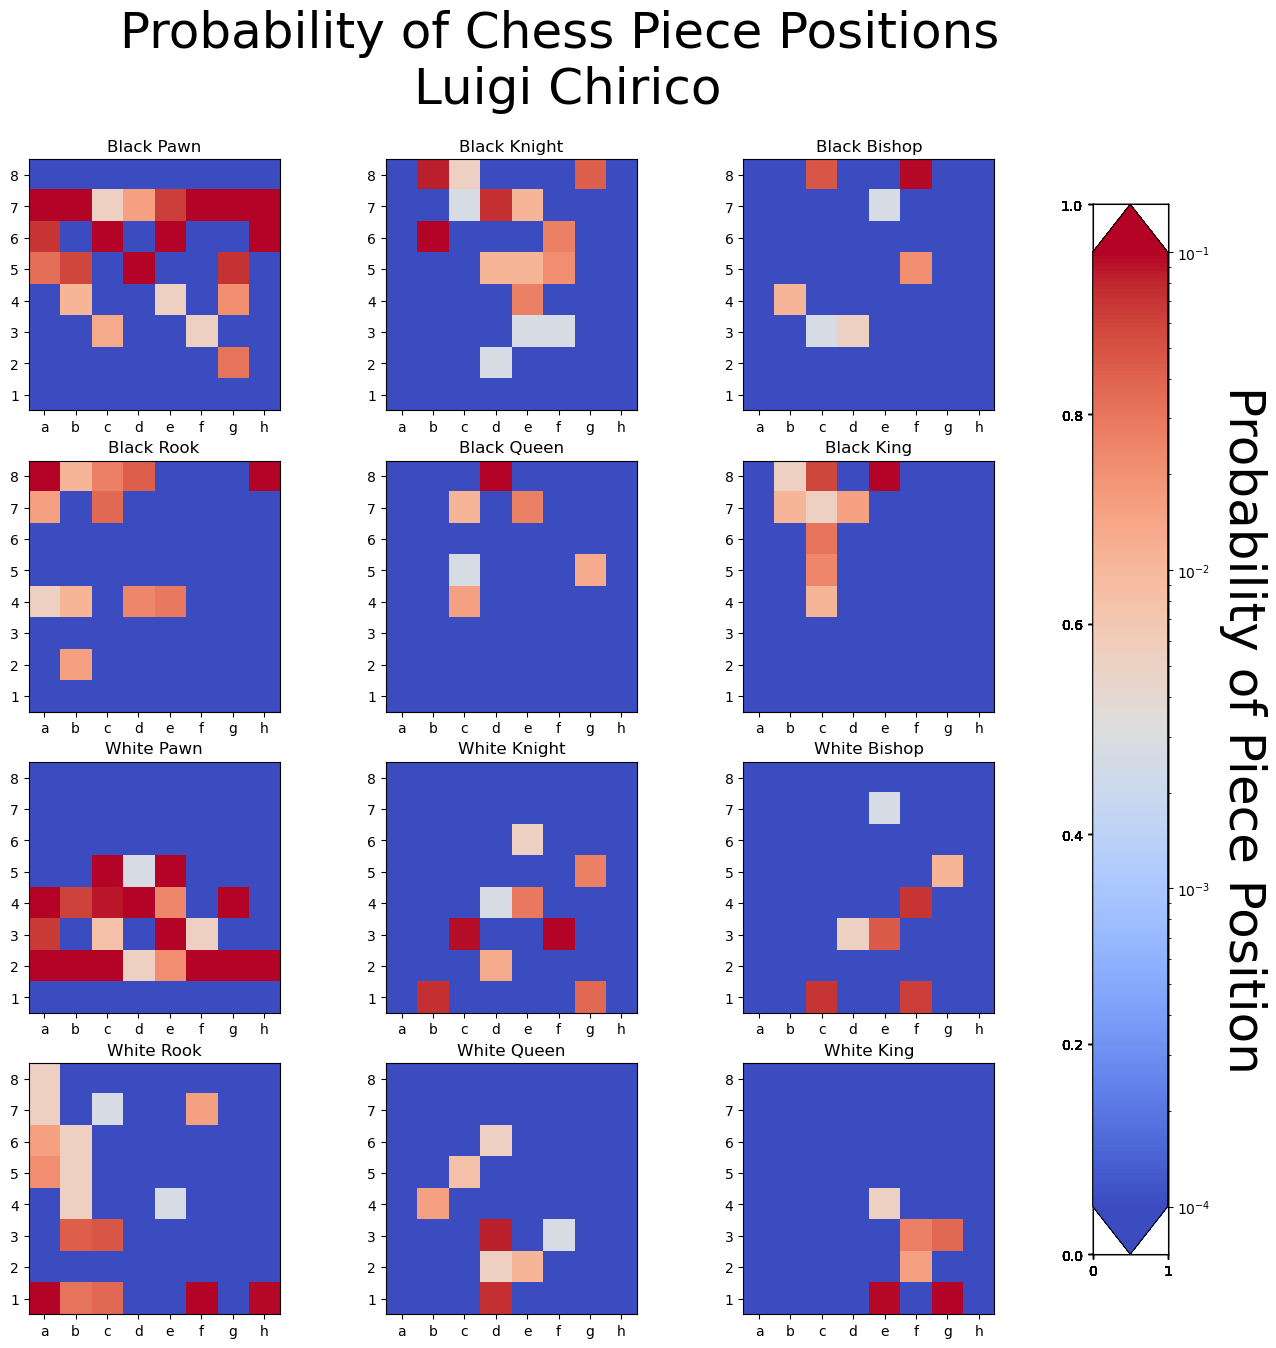

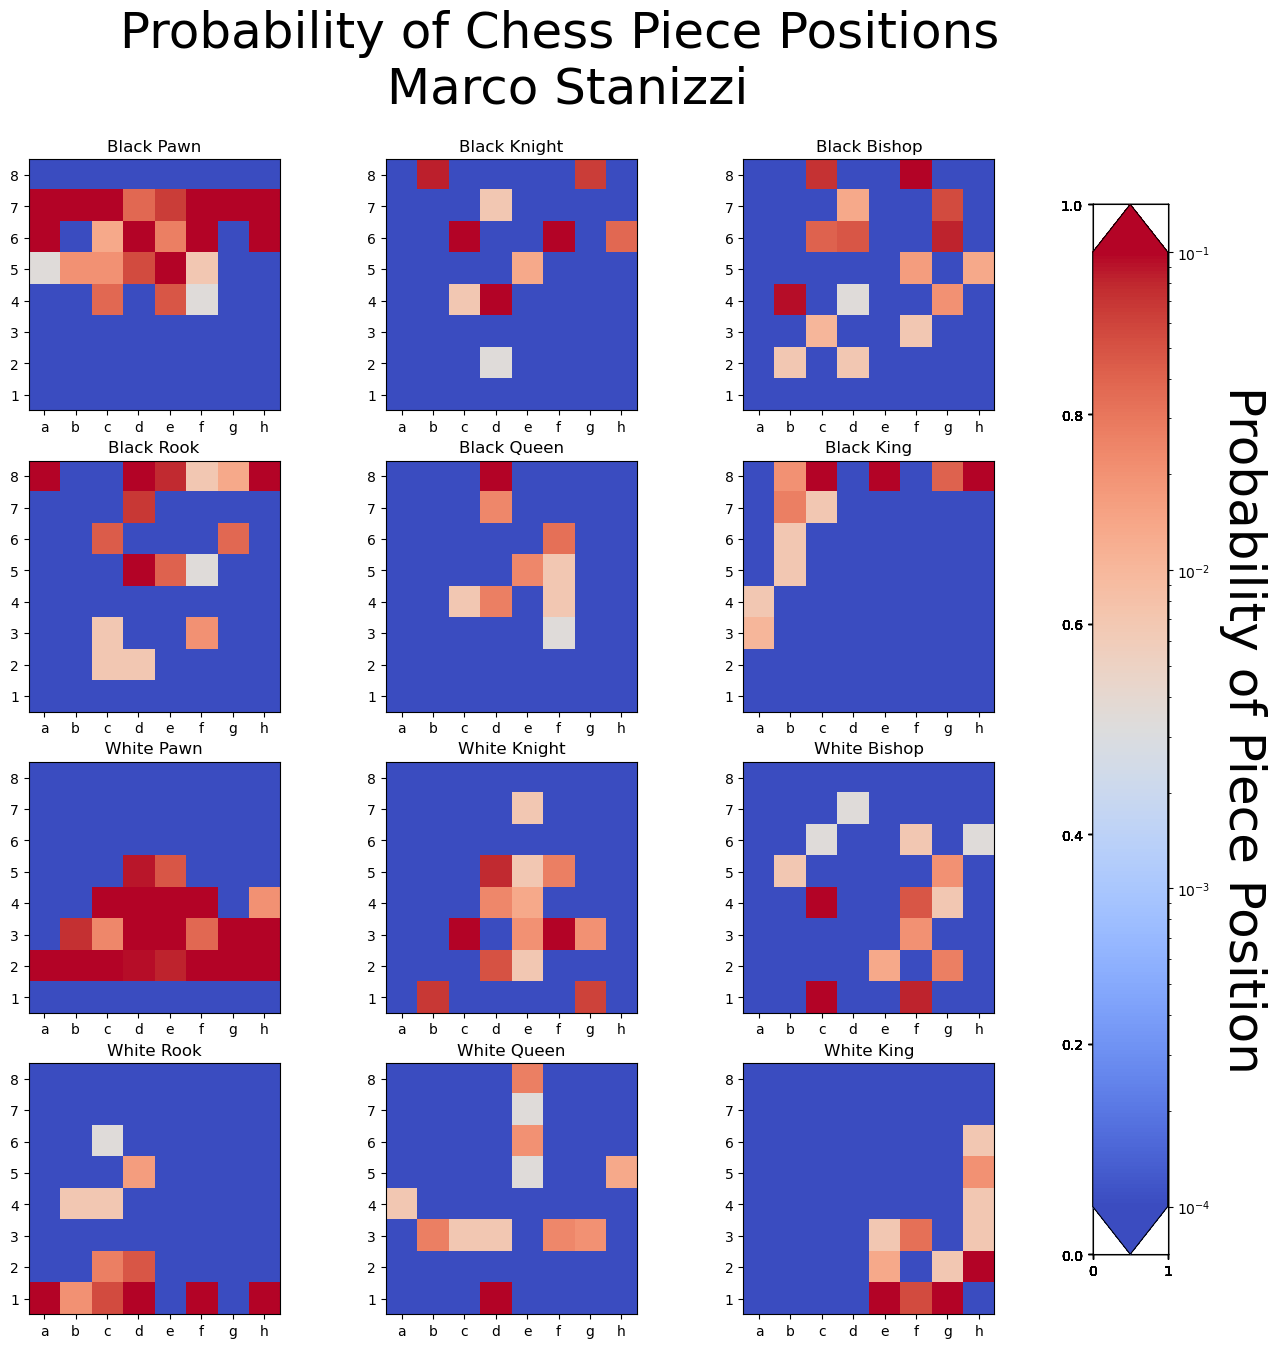

In [57]:
database = 'lichess_study_la-grande-azzuffata-2022_by_natopigro_2022.10.12.pgn'
database_clean = database+'_clean.pgn'

pgn = open(database)
players = ['Pierluigi Olivetti',
            'Giampaolo Camera',
            'Franco Saiano',
            'Pietro Andreetta',
            'Lorenzo Satta',
            'Daniele Calucci',
            'Riccardo Dordoni',
            'Lorenzo Sangiorgi',
            'Enrico Moresco',
            'Alessandro Piazza',
            'Saverio Tammarazio',
            'Matteo Alticozzi',
            'Ezio Del Nero',
            'Sara Biagetti',
            'Antonello Pumilia',
            'Lorenzo Divano',
            'Luigi Chirico',
            'Marco Stanizzi']
for player in players:
    #player = 'Giampaolo Camera'
    #n_games=get_number_of_game_in_pgn(pgn, player)
    positions = get_positions(pgn, player)
    plot_pieces_probability(positions, save_fig=True, player=player)    
positions = get_positions(pgn)
plot_pieces_probability(positions, save_fig=True)   

In [37]:
n_games

5